# Miles in the Sky Data Science Course - Final Project "Data Analytics 101"

This repository is part of the learning objectives of the [Data Science Course](https://milesinthesky.education/programs-by-miles/) provided by Miles in the Sky.

## Table of Contents

- [Project Description](#Project-Description)

- [The Dataset](#The-Dataset)

- [Answering Business Questions](#Answering-Business-Questions)

- [Outro](#Outro)






# Project Description

In this project, the main goal was to analyse, formulate, and answer business questions of a dataset by ourselves! All of this, while being aware of the most common Data Science pitfalls.

I've worked with a credit card score dataset in which I had to analyse what makes a credit card application have high default risk. When I speak of default risk, I'm referring to the risk that a lender takes on in the chance that a borrower will be unable to make the required payments on their debt obligation.

It's a challenging, but a very interesting dataset to tackle.

More details about this project can be found in the README of the repository containing this notebook.

## Install Dependencies

In [ ]:
!pip install pandas==1.3.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 81.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
bigframes 0.15.0 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.3.5 which is incompatible.
plotnine 0.12.4 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
xarray 2023.7.0 requires pandas>=1.4, but you have pandas 1.3.5 which is incompatible.


## Directory Setup

In [ ]:
!rm -rf /content/sample_data/
!mkdir /content/data/ /content/data/raw/ /content/data/processed/

## Context
Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.

Generally speaking, credit score cards are based on historical data. Once encountering large economic fluctuations. Past models may lose their original predictive power.

### Content & Explanation
#### Attribute Information of [credit_card_applications.csv](https://miles-become-a-data-scientist.s3.us-east-2.amazonaws.com/J1/M7/data/raw/credit_card_applications.csv):
`ID`:	Client number

`CODE_GENDER`:	Gender

`FLAG_OWN_CAR`:	Is there a car

`FLAG_OWN_REALTY`:	Is there a property

`CNT_CHILDREN`:	Number of children

`AMT_INCOME_TOTAL`:	Annual income

`NAME_INCOME_TYPE`:	Income category

`NAME_EDUCATION_TYPE`:	Education level

`NAME_FAMILY_STATUS`:	Marital status

`NAME_HOUSING_TYPE`:	Way of living

`DAYS_BIRTH`:	Birthday. Count backwards from current day (0), -1 means yesterday.

`DAYS_EMPLOYED`:	Start date of employment. Count backwards from current day(0). If positive, it means the person currently unemployed.

`FLAG_MOBIL`:	Is there a mobile phone

`FLAG_WORK_PHONE`:	Is there a work phone

`FLAG_PHONE`:	Is there a phone

`FLAG_EMAIL`:	Is there an email

`OCCUPATION_TYPE`:	Occupation

`CNT_FAM_MEMBERS`:	Family size

`DEFAULT_RISK`:	The applicant has a high default risk

## Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind, chi2


# The Dataset

There are 19 columns to analyse with the attribute information of [credit_card_applications.csv](https://miles-become-a-data-scientist.s3.us-east-2.amazonaws.com/J1/M7/data/raw/credit_card_applications.csv)


## Load Data

In [ ]:
credit_df = pd.read_csv('https://miles-become-a-data-scientist.s3.us-east-2.amazonaws.com/J1/M7/data/raw/credit_card_applications.csv')

## Data Overview

In [ ]:
print(credit_df.shape)
credit_df.head()

(36457, 19)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DEFAULT_RISK
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0


In [ ]:
credit_df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
DEFAULT_RISK             int64
dtype: object

In [ ]:
#Checking the total number of missing values with .isnull().sum()

credit_df.isnull().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
DEFAULT_RISK               0
dtype: int64

Looks like ```OCCUPATION_TYPE``` is the only column with missing values, 11323 to be precise. This might be due to the number of unemployed applicants.

In [ ]:
#The total number of duplicates with .duplicated().sum()

credit_df.duplicated().sum()

0

## Analyzing the Target Variable

###  `DEFAULT_RISK`

In [ ]:
#Check the possible values that DEFAULT_RISK can have and how many there are
def_risk = credit_df['DEFAULT_RISK'].value_counts()
def_risk

0    35841
1      616
Name: DEFAULT_RISK, dtype: int64

This is a binary variable, because it has two possible values 0 (low default risk) and 1 (high default risk). As this is the variable I want to analyse I can say it has two classes: 0 and 1.

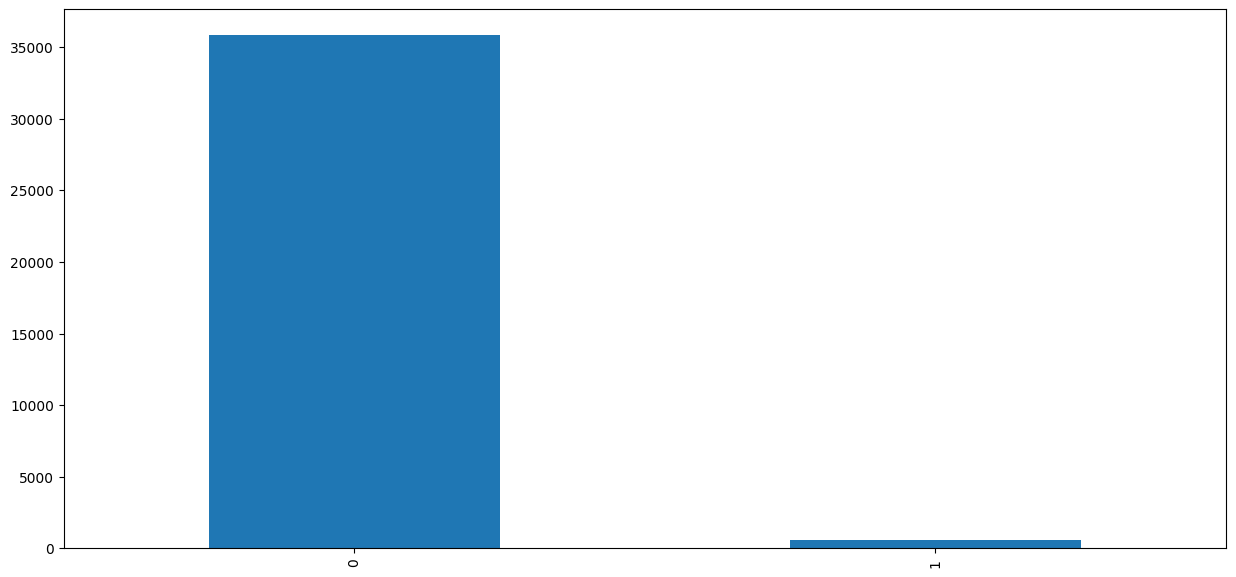

In [ ]:
#Make it visual
def_risk.plot(kind='bar', figsize=(15,7))
plt.show()

There is a huge difference between the 2 possible results.

In [ ]:
#Comparison of the weight between classes
def_risk_norm = credit_df['DEFAULT_RISK'].value_counts(normalize=True) * 100
def_risk_norm

0    98.310338
1     1.689662
Name: DEFAULT_RISK, dtype: float64

Roughly 1.7% of the credit card applications have a high default risk! This is what it's called an imbalanced class: it's when one class is much less frequent than the other

## Analyzing Numerical Variables

Since the next task is somewhat repetitive, I've defined two functions to expedite the process of analyzing the numerical variables:

```describe_var``` describes the analysed variable, creates a histogram and boxplot.

```t_test_ind``` calculate the T-test between two variables with alpha=0.05 to determine if they are independent or not.

In [ ]:
#describe_var
def describe_var(df,column, target, bins):

  '''
  df- dataframe
  column - numerical variable
  target - target variable
  bins - number of bins to create the histogram
  '''

  print(df[column].describe())
  print('\n\n')

  df[column].plot.hist(bins=bins, figsize=(13,10))
  plt.show()

  df.boxplot(column=column, by=target, vert=False, figsize=(19,10), notch=True)
  plt.show()

In [ ]:
#t_test_ind
def t_test_ind (df, column, target):

  '''
  df - dataframe
  column - numerical variable
  target - target variable
  '''

  low_risk = df.loc[df[target] == 0, column ]
  high_risk = df.loc[df[target] == 1, column ]

  statistic, pvalue = ttest_ind(low_risk, high_risk)
  alpha = 0.05

  print(f"Null Hypothesis (Ho): variables {column} and {target} are independent")
  print(f"Alternative Hypothesis (Ha): variables {column} and {target} aren't independent")
  print(f'\nP-value:{pvalue:.4f}         alpha={alpha}')


  if pvalue < alpha:
      print(f"we are rejecting the null hypothesis {pvalue:.4f}<{alpha}. Use for the model")
  else:
      print(f'we failed to reject null hypothesis {pvalue:.4f}>{alpha}.')

### `CNT_CHILDREN`

The number of children a client has.

count    36457.000000
mean         0.430315
std          0.742367
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         19.000000
Name: CNT_CHILDREN, dtype: float64





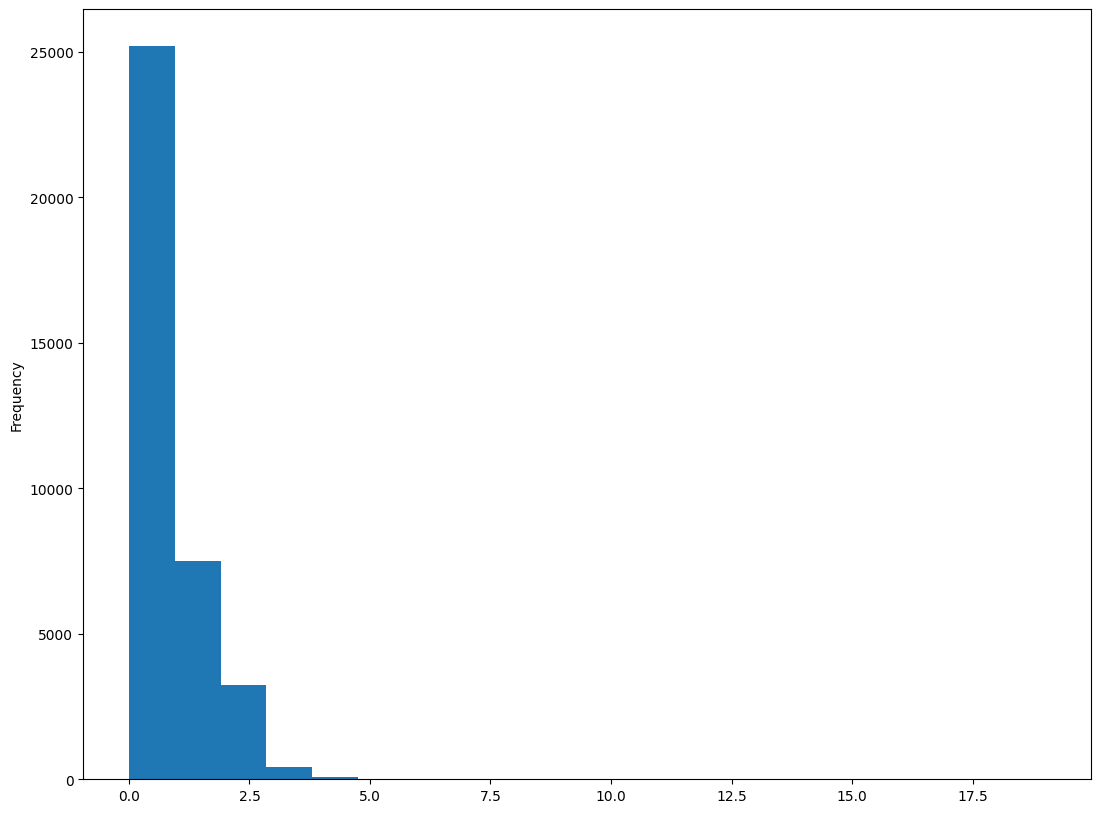

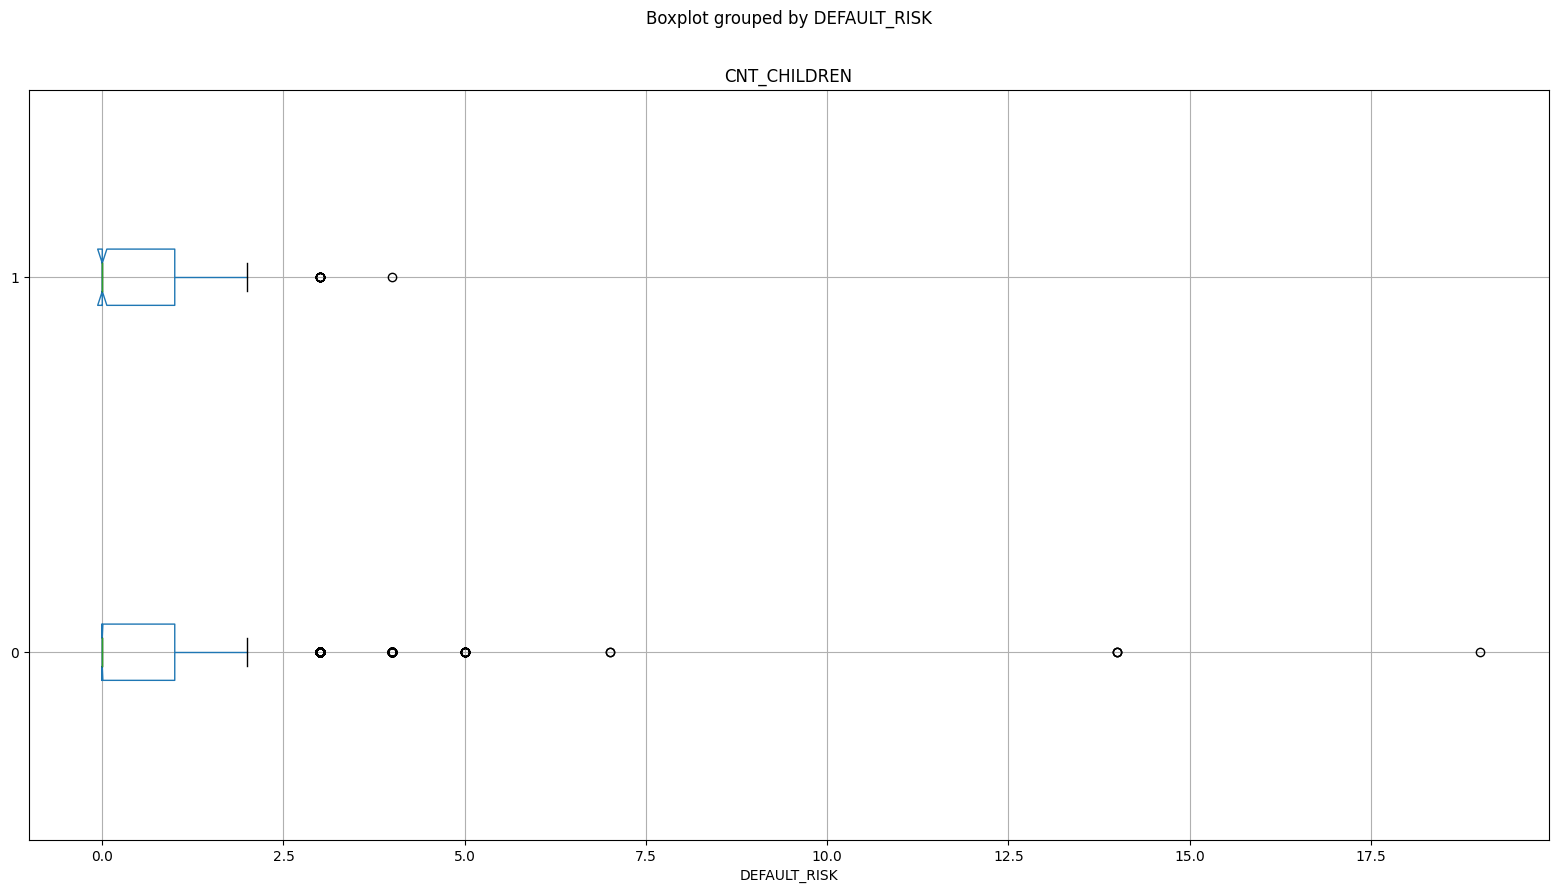

In [ ]:
describe_var(credit_df,'CNT_CHILDREN','DEFAULT_RISK', 20)

In [ ]:
t_test_ind(credit_df,'CNT_CHILDREN','DEFAULT_RISK')

Null Hypothesis (Ho): variables CNT_CHILDREN and DEFAULT_RISK are independent
Alternative Hypothesis (Ha): variables CNT_CHILDREN and DEFAULT_RISK aren't independent

P-value:0.9531         alpha=0.05
we failed to reject null hypothesis 0.9531>0.05.


#### **Analysis**

- The highest number of children is 19;

- 50% of the candidates have no children;

- The histogram suggests the presence of several outliers (not visible) and displays an exponential distribution;

- Comparing the boxplot results, there are no significant differences between the two groups;

- We observe that among individuals that didn't default there are more outliers;

- The variables ```CNT_CHILDREN``` and ```DEFAULT_RISK``` are independent.

#### **Conclusion**

It's common to have children and just by having children doesn't necessarily mean that someone will have enough funds to pay for the credit. It has to be other factors.

**This variable should not be considered for modelling**

### `AMT_INCOME_TOTAL`

The annual income of the applicant.

count    3.645700e+04
mean     1.866857e+05
std      1.017892e+05
min      2.700000e+04
25%      1.215000e+05
50%      1.575000e+05
75%      2.250000e+05
max      1.575000e+06
Name: AMT_INCOME_TOTAL, dtype: float64





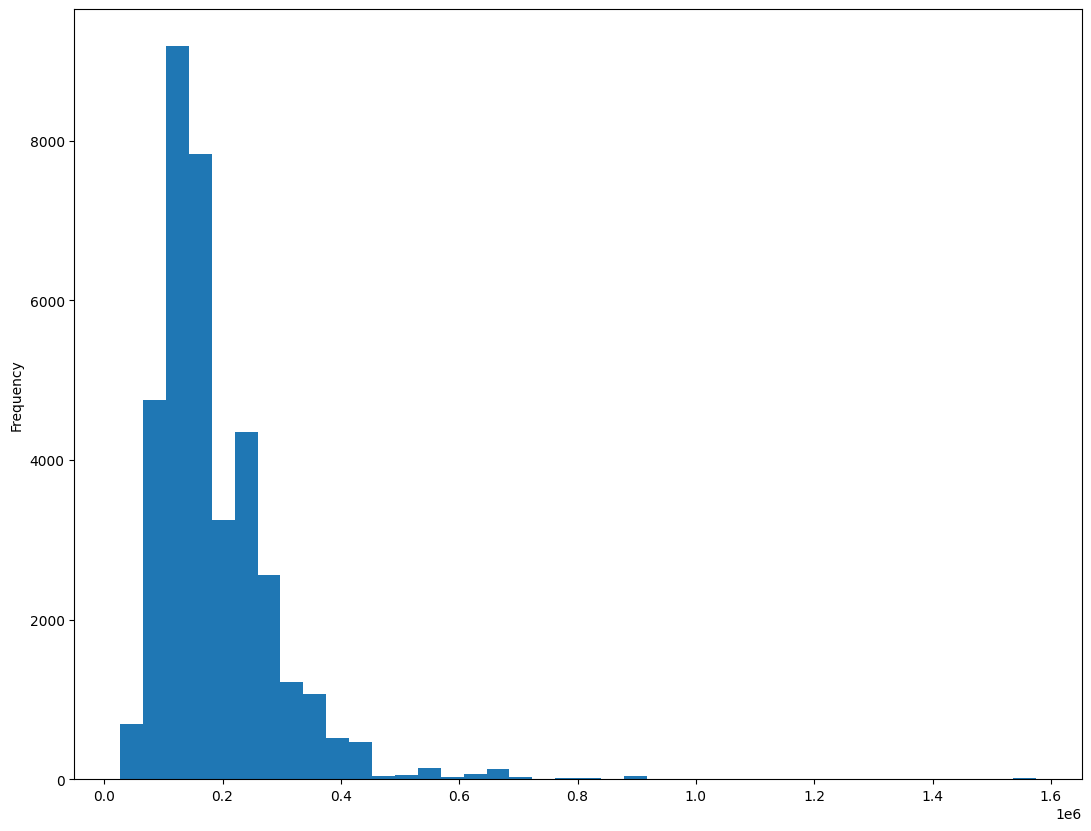

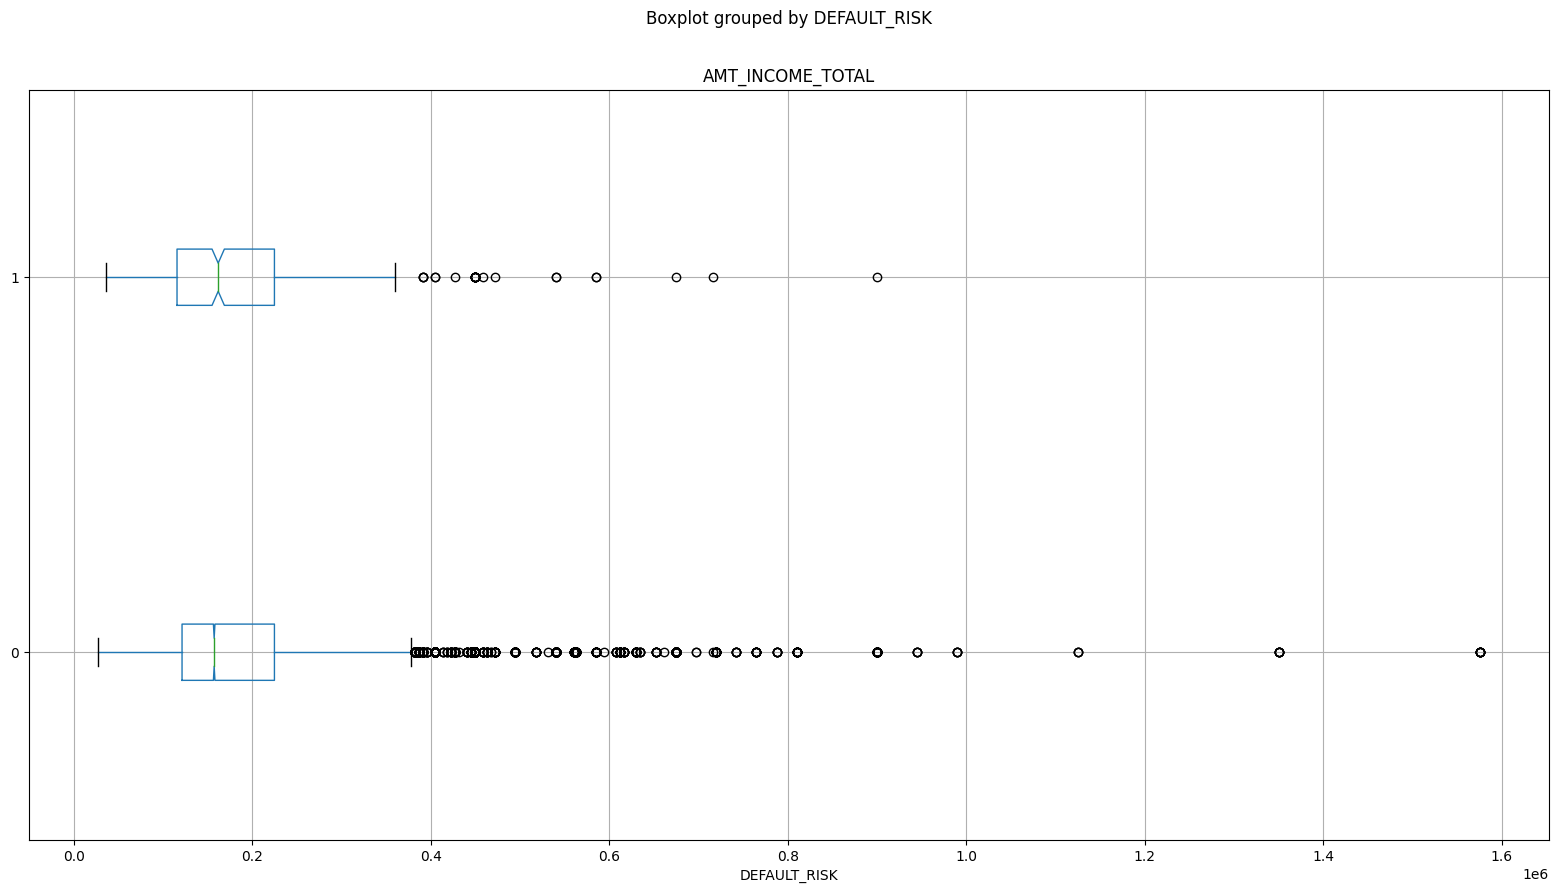

In [ ]:
describe_var(credit_df,'AMT_INCOME_TOTAL', 'DEFAULT_RISK',40)

In [ ]:
t_test_ind(credit_df,'AMT_INCOME_TOTAL','DEFAULT_RISK')

Null Hypothesis (Ho): variables AMT_INCOME_TOTAL and DEFAULT_RISK are independent
Alternative Hypothesis (Ha): variables AMT_INCOME_TOTAL and DEFAULT_RISK aren't independent

P-value:0.8400         alpha=0.05
we failed to reject null hypothesis 0.8400>0.05.


#### **Analysis**

- The histogram seems to tend towards a log-normal distribution;

- There are some outliers;

- Comparing the boxplot results, there are no significant differences between the two groups;

- We noticed that among individuals with low default risk there are more outliers.

- The variables ```AMT_INCOME_TOTAL``` and ```DEFAULT_RISK``` are independent.

#### **Conclusion**

Does it make sense? Not really, it was expected that low incomes would have more trouble paying credit, but it looks that there are other factors in play.

**This variable should not be considered for modelling**

### `DAYS_BIRTH`

The applicant's birthday. Count backwards from current day (0), -1 means yesterday. I'll invert it to make it easier to understand.

In [ ]:
#Convert the days into years and create a column for analyzing the variable (use -1 to represent positive numbers)
credit_df['Age'] = (credit_df['DAYS_BIRTH']* -1)/365

count    36457.000000
mean        43.767598
std         11.508356
min         20.517808
25%         34.142466
50%         42.638356
75%         53.254795
max         68.909589
Name: Age, dtype: float64





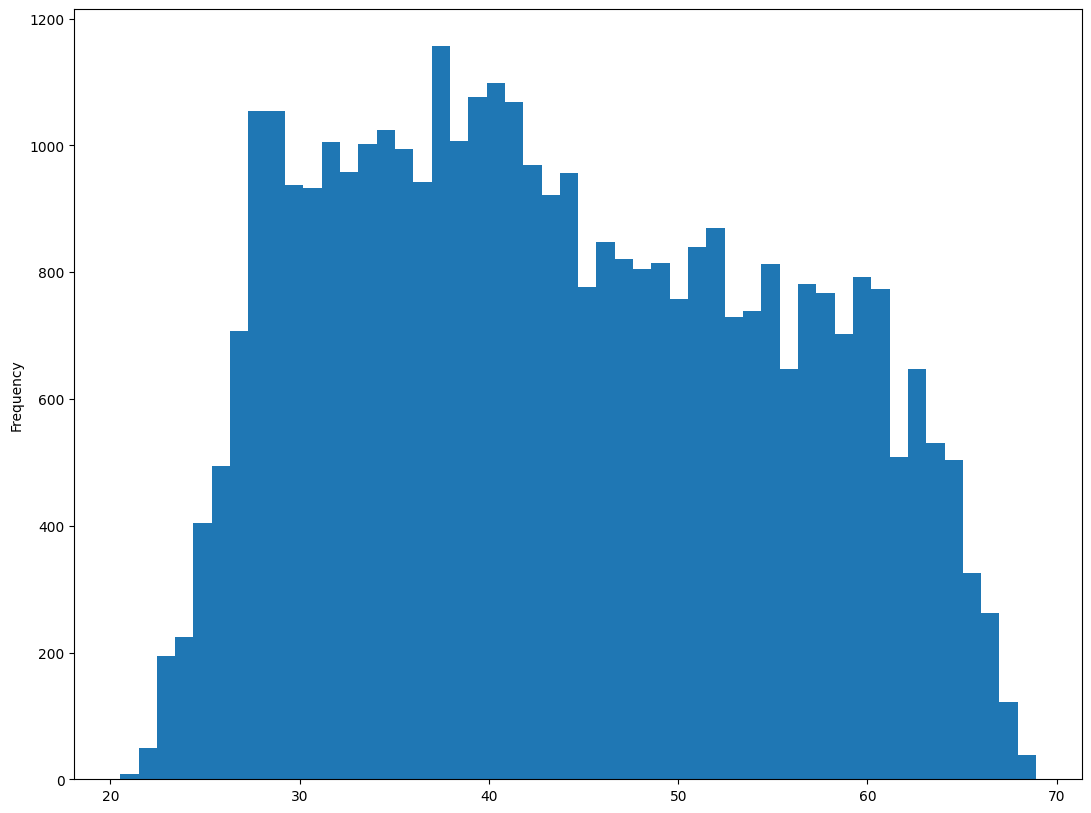

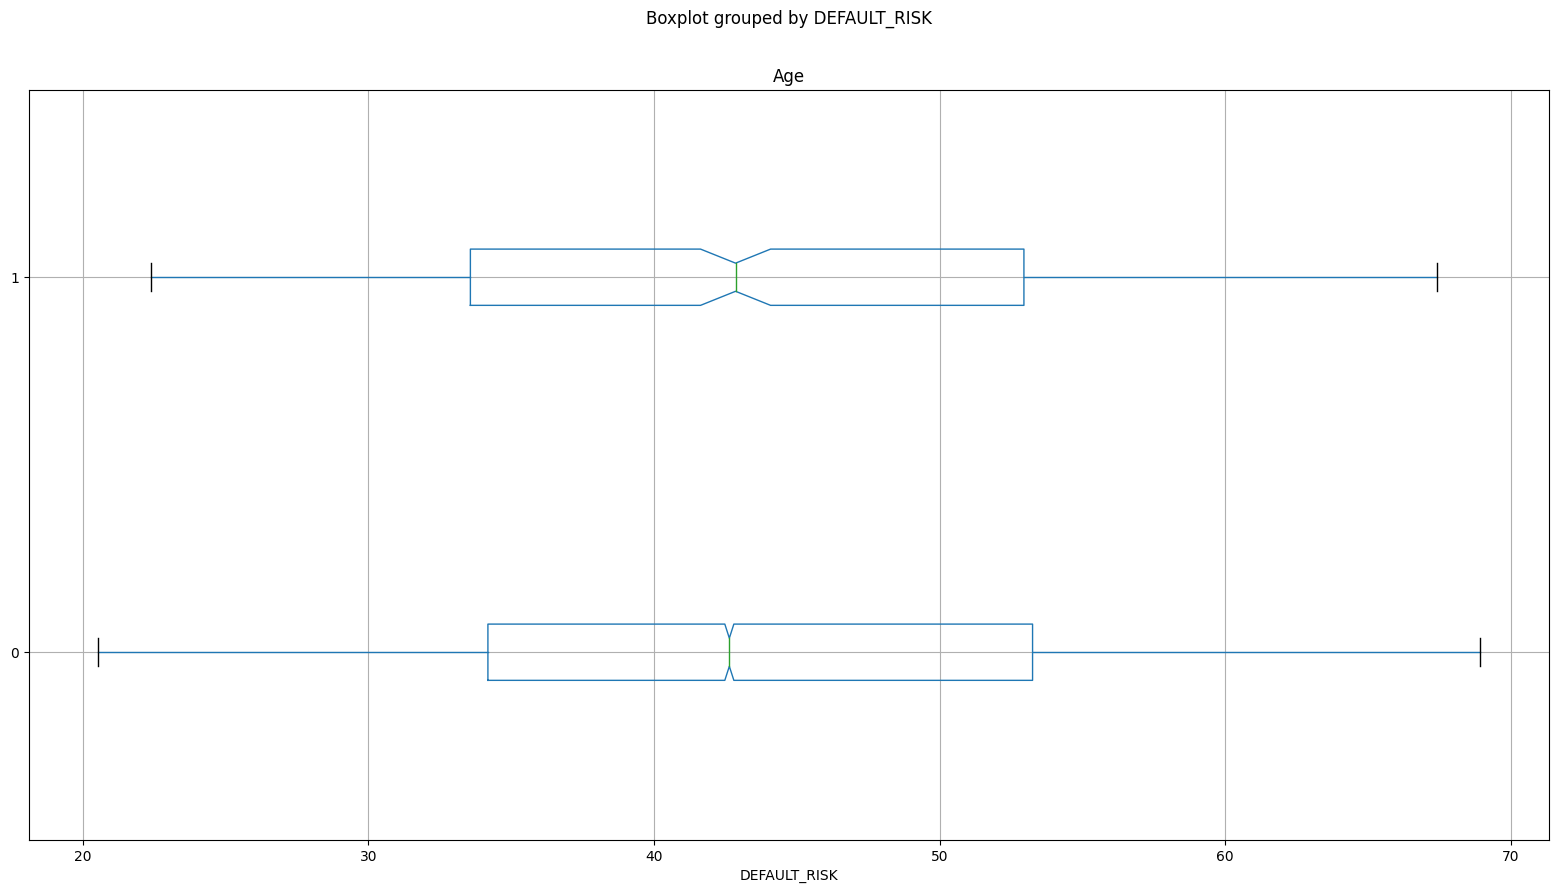

In [ ]:
describe_var(credit_df,'Age', 'DEFAULT_RISK',50)

In [ ]:
t_test_ind(credit_df,'DAYS_BIRTH','DEFAULT_RISK')

Null Hypothesis (Ho): variables DAYS_BIRTH and DEFAULT_RISK are independent
Alternative Hypothesis (Ha): variables DAYS_BIRTH and DEFAULT_RISK aren't independent

P-value:0.7777         alpha=0.05
we failed to reject null hypothesis 0.7777>0.05.


#### **Analysis**

- Applicants are on average 34 years old, being the youngest 20 and the oldest around 69;

- Comparing the boxplot results, there aren't significant differences between the two groups;

- We found that there are no significant outliers;

- The variables ```DAYS_BIRTH``` and ```DEFAULT_RISK``` are independent.

#### **Conclusion**

I would expect that younger and older people could have higher default risks but it isn't that significant comparing the whole sample of applicant with high default risk to those with low default risk.


**This variable should not be considered for modelling.**


### `DAYS_EMPLOYED`

The start day of employment. Count backwards from current day(0). If positive, it means the current person is unemployed.

In [ ]:
#Removal of the unemployed people from the dataset

credit_df['employed_days'] = 1
credit_df.loc[credit_df['DAYS_EMPLOYED']<0,'employed_days'] = credit_df.loc[credit_df['DAYS_EMPLOYED']<0,'DAYS_EMPLOYED']

#Conversion of the information into years instead of days for better comprehension
credit_df['years_employed'] = (credit_df['employed_days']* -1)/365


count    36457.000000
mean         6.027805
std          6.484803
min         -0.002740
25%          1.117808
50%          4.252055
75%          8.638356
max         43.049315
Name: years_employed, dtype: float64





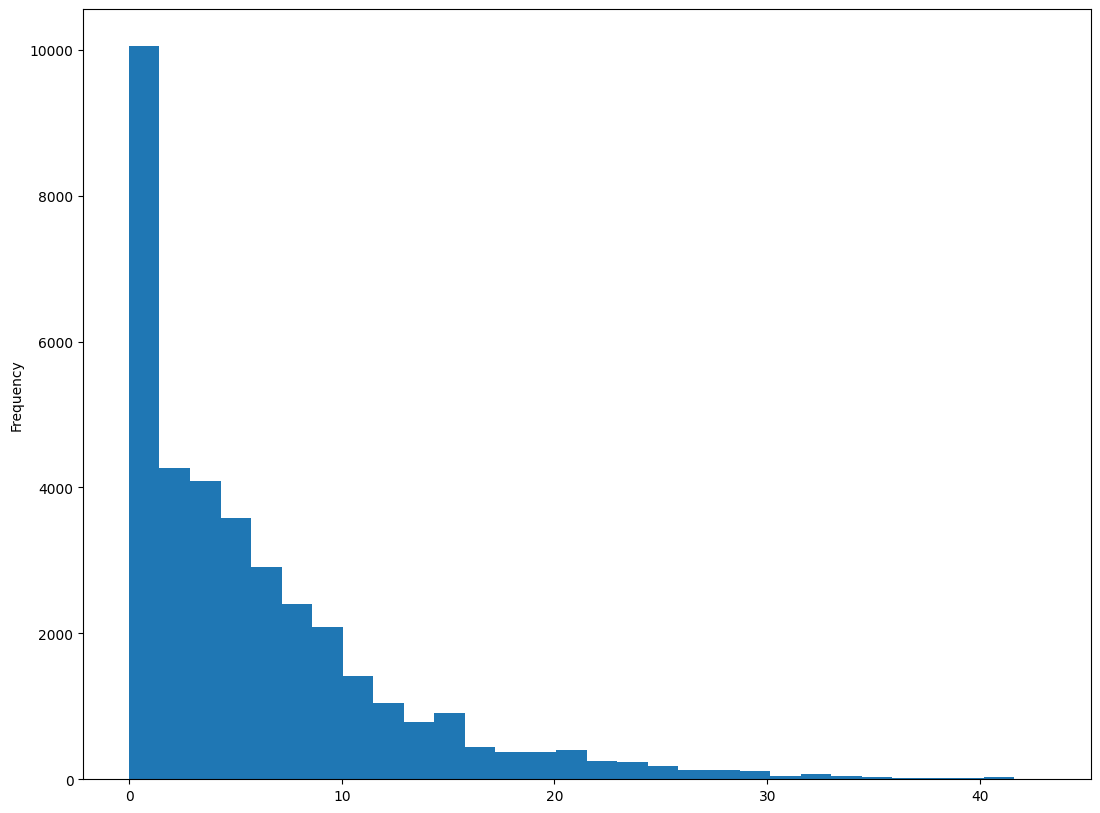

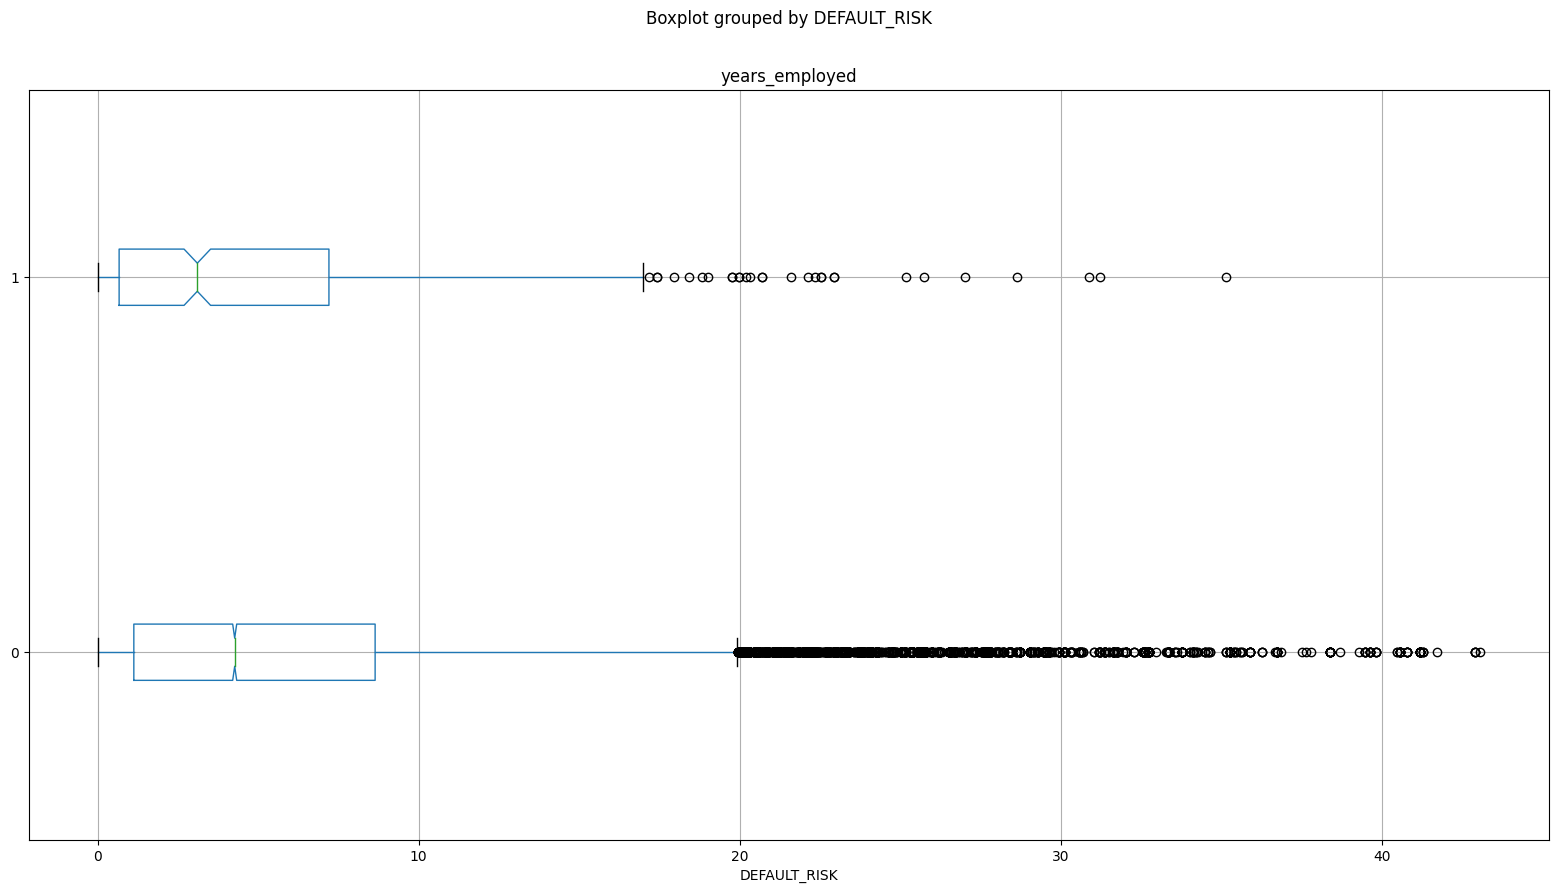

In [ ]:
describe_var(credit_df,'years_employed','DEFAULT_RISK', 30)

In [ ]:
t_test_ind(credit_df,'years_employed','DEFAULT_RISK')

Null Hypothesis (Ho): variables years_employed and DEFAULT_RISK are independent
Alternative Hypothesis (Ha): variables years_employed and DEFAULT_RISK aren't independent

P-value:0.0000         alpha=0.05
we are rejecting the null hypothesis 0.0000<0.05. Use for the model


#### **Analysis**

- The histogram appears to trend towards an exponential distribution, especially after the outliers were removed;

- Comparing the boxplot results, there are no significant differences between the two groups;

- The variables ```years_employed``` and ```DEFAULT_RISK``` are dependent.


#### **Conclusion**

A lower number of employed days could be related to a risk of job instability or higher turnover jobs which can be a risk factor.

**This variable should be considered for modelling.**

### `CNT_FAM_MEMBERS`

The applicant's number of family members

count    36457.000000
mean         2.198453
std          0.911686
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         20.000000
Name: CNT_FAM_MEMBERS, dtype: float64





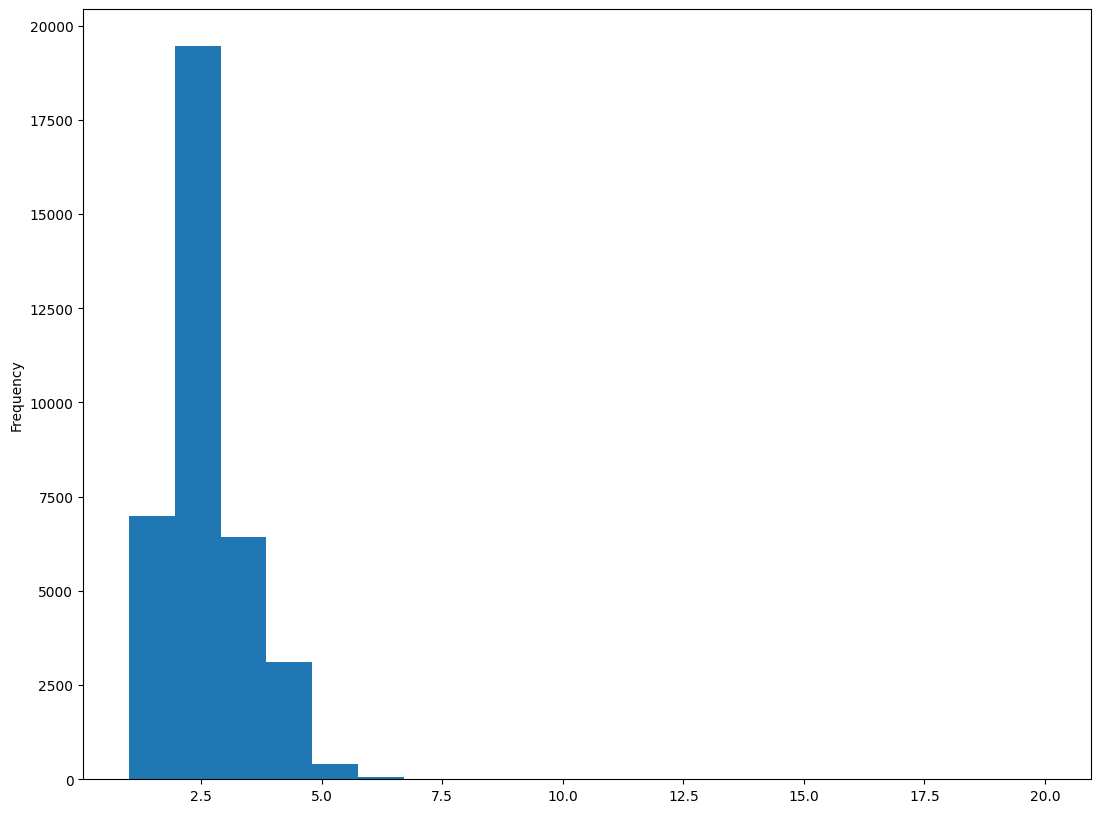

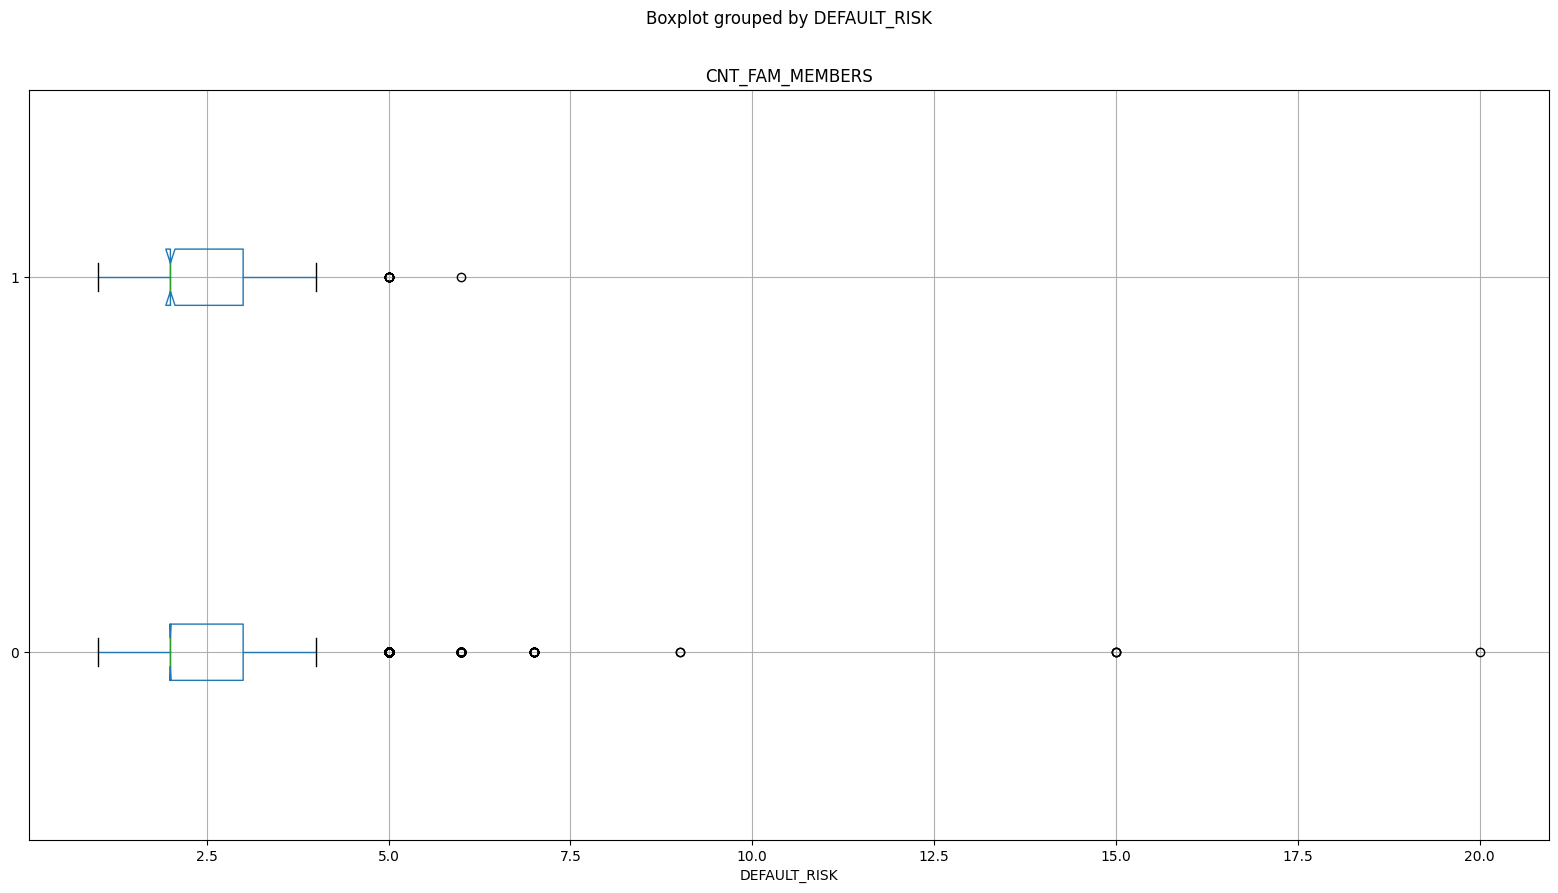

In [ ]:
describe_var(credit_df,'CNT_FAM_MEMBERS','DEFAULT_RISK',20)

In [ ]:
t_test_ind(credit_df,'CNT_FAM_MEMBERS','DEFAULT_RISK')

Null Hypothesis (Ho): variables CNT_FAM_MEMBERS and DEFAULT_RISK are independent
Alternative Hypothesis (Ha): variables CNT_FAM_MEMBERS and DEFAULT_RISK aren't independent

P-value:0.2798         alpha=0.05
we failed to reject null hypothesis 0.2798>0.05.


#### **Analysis**

- The histogram seems to suggest a log-normal distribution. There are some outliers

- Comparing the boxplot results, there are no major differences between the two groups.

- The variables ```CNT_FAM_MEMBERS``` and ```DEFAULT_RISK``` are independent.



#### **Conclusion**
It's possible that the family size may not be a risk factor for defaulting.

**This variable should not be considered for modelling.**

## Analyzing Nominal Variables

Since the next task is as well somewhat repetitive, I've defined four functions to expedite the process of analyzing the nominal variables:

```sizes``` one table as reference to interpret the Cramer's V values.

```nominal_des``` prints the value counts, creates a bar chart and a bar plot with the average values.

```test_chi``` gets a contigency table and performs a chi squared test.

```cramers_v``` an effect size measurement for the chi-square test of independence.

In [ ]:
def sizes() :
  np_data = np.array([[1, .1, .3, .5],
      [2, .07, .21, .35],
      [3, .06, .17, .29],
      [4, .05,.15,.25],
      [5, .04, .13, .22]])
  return print(pd.DataFrame(np_data, columns=['DoF', 'Small', 'Medium', 'Large']))

In [ ]:
def nominal_des(df,column, target):
  '''
  df - dataframe
  column - nominal variable
  target - target variable
  '''


  var_per =df[column].value_counts(normalize=True)
  print(f"Percentage value of the column:\n{var_per}\n",)

  var_qua = df[column].value_counts(normalize=False)
  print(f"Quantitative value of the column:\n{var_qua}\n")

  fig, ax = plt.subplots(figsize=(15, 10))
  var_per.plot.bar()
  plt.title("Bar chart")
  plt.show()

  print()
  fig, ax = plt.subplots(figsize=(25, 15))
  sns.barplot(data=df, x=column, y=target)
  plt.xticks(rotation=90, ha='right')

  plt.title("Check avg for each group - default_risk")
  plt.show()

In [ ]:
def test_chi (df,column,target):

  '''
  df - dataframe
  column - nominal variable
  target - target variable
  '''

  print(f"Null Hypothesis (Ho): variables {column} and {target} are independent ")
  print("Alternative Hypothesis (Ha): variables aren't independent\n")
  var_table =  pd.crosstab(df[column], credit_df[target])
  stat,  p, dof, expected = chi2_contingency(var_table)

  print('Contingency Table')
  print(var_table)

  # interpret test-statistic
  prob = 0.95
  '''
  critical = chi2.ppf(prob, dof)
  print(f'\nprobability={prob}, critical={critical}, stat={stat}')

  if abs(stat) >= critical:
    print('Dependent (reject H0)')
  else:
    print('Independent (fail to reject H0)')
  '''
  # interpret p-value
  alpha = 1.0 - prob

  print('\nAlpha=%.3f, p=%.3f' % (alpha, p))
  if p <= alpha:
    print('Dependent (reject H0) p-value < alpha')
  else:
    print('Independent (fail to reject H0) p-value>alpha')

  return var_table

In [ ]:
def cramers_v(cross_tabs):
    """
    Prints the degrees of freedom, effect size thresholds, and Cramer's V value.

    Args:
        cross_tabs: A crosstab dataframe.
    """


    # getting the chi sq. stat
    chi2 = chi2_contingency(cross_tabs)[0]
    # calculating the total number of observations
    n = cross_tabs.sum().sum()
    # getting the degrees of freedom
    dof = min(cross_tabs.shape)-1
    # calculating cramer's v
    v = np.sqrt(chi2/(n*dof))
    # printing results
    print(f'V = {v}')
    print(f'Cramer\'s V Degrees of Freedom = {dof}\n')
    sizes()

### `ID`

In [ ]:
credit_df['ID'].head()

0    5008804
1    5008805
2    5008806
3    5008808
4    5008809
Name: ID, dtype: int64

This is an identifying variable for the customers.

**This variable should not be considered for modelling.**

### `CODE_GENDER`

Gender of the clients.

Percentage value of the column:
F    0.670105
M    0.329895
Name: CODE_GENDER, dtype: float64

Quantitative value of the column:
F    24430
M    12027
Name: CODE_GENDER, dtype: int64



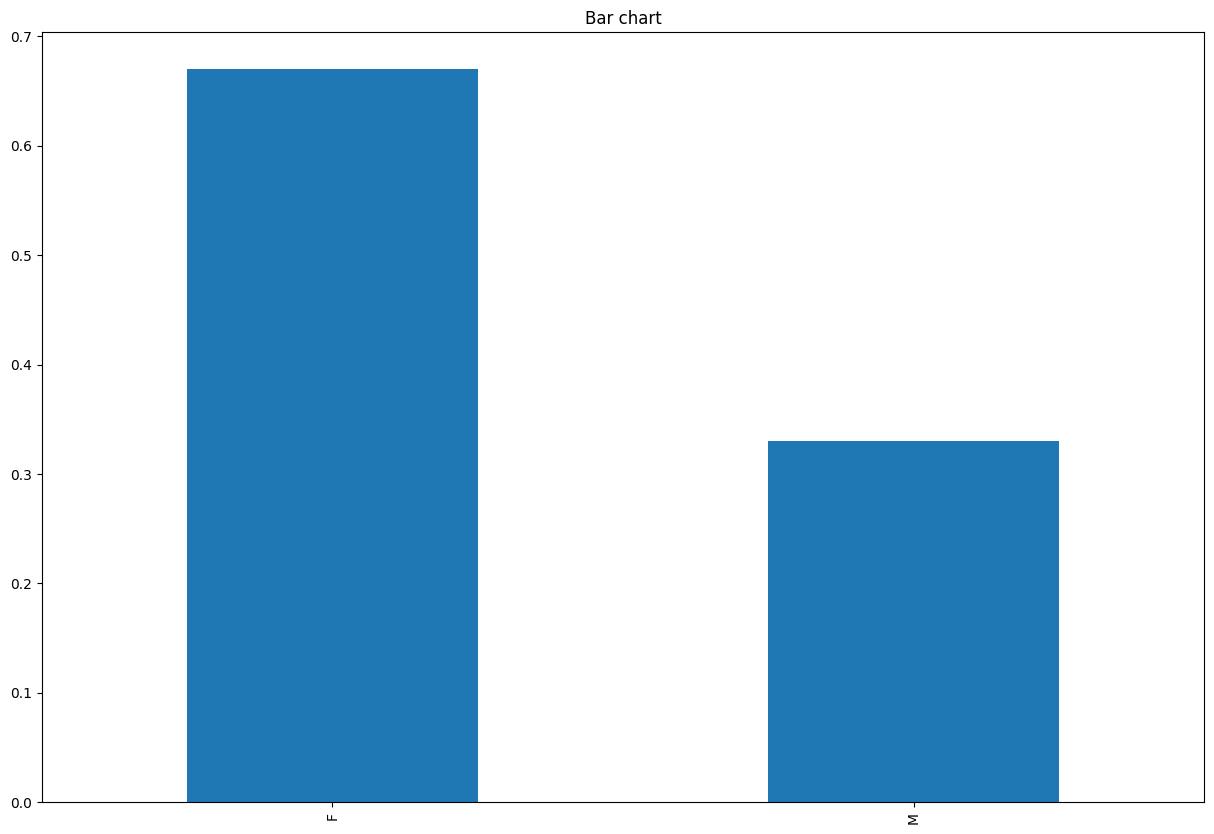

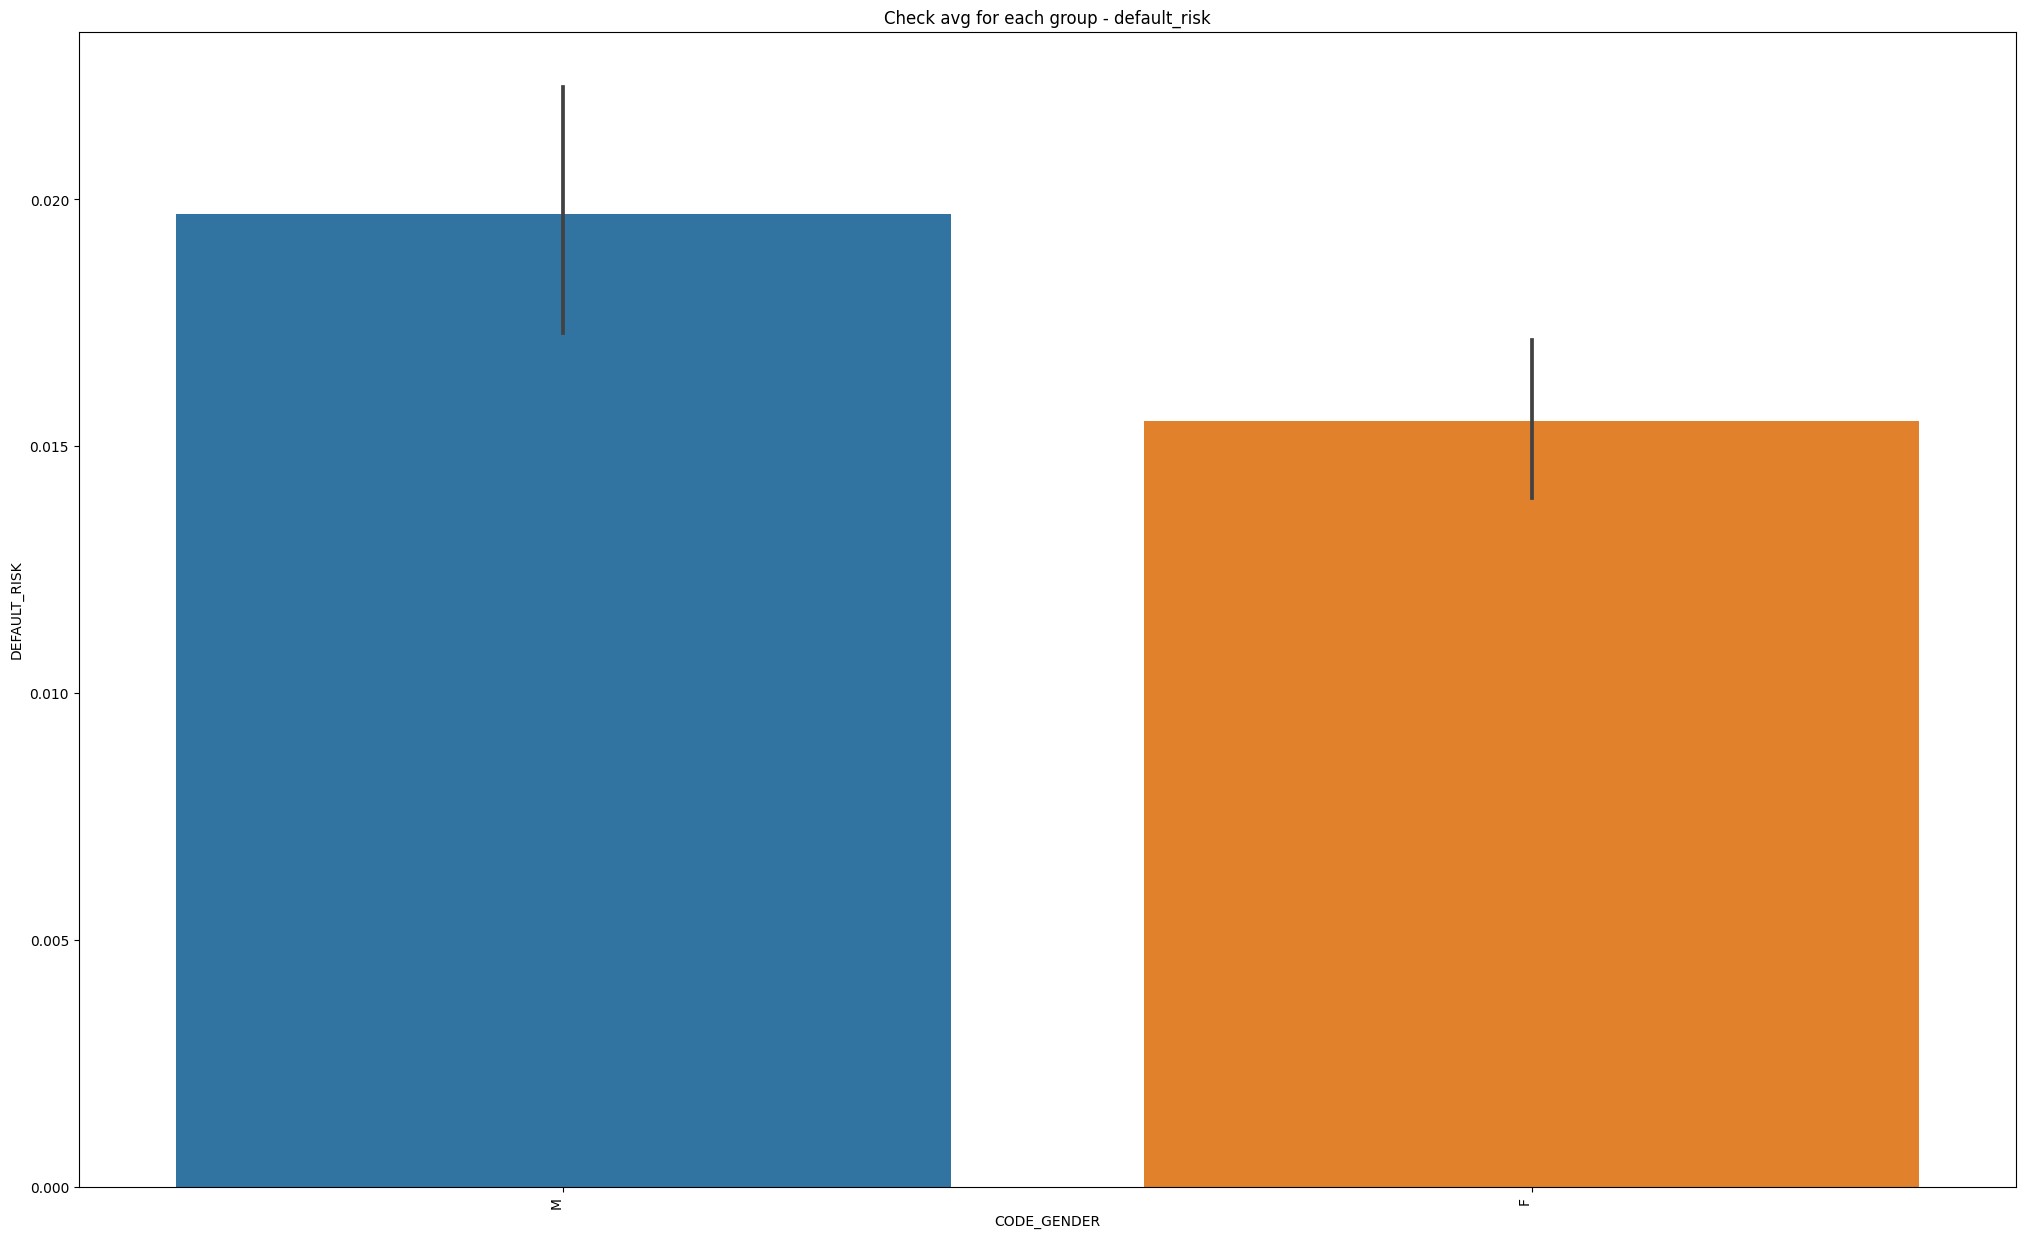

In [ ]:
nominal_des(credit_df,'CODE_GENDER','DEFAULT_RISK')

In [ ]:
gender_table = test_chi(credit_df,'CODE_GENDER','DEFAULT_RISK')

Null Hypothesis (Ho): variables CODE_GENDER and DEFAULT_RISK are independent 
Alternative Hypothesis (Ha): variables aren't independent

Contingency Table
DEFAULT_RISK      0    1
CODE_GENDER             
F             24051  379
M             11790  237

Alpha=0.050, p=0.004
Dependent (reject H0) p-value < alpha


In [ ]:
cramers_v(gender_table)

V = 0.015066089564786472
Cramer's V Degrees of Freedom = 1

   DoF  Small  Medium  Large
0  1.0   0.10    0.30   0.50
1  2.0   0.07    0.21   0.35
2  3.0   0.06    0.17   0.29
3  4.0   0.05    0.15   0.25
4  5.0   0.04    0.13   0.22


#### **Analysis**

Assuming that "F" stands for Female applicants and "M" for Male applicants, there are more female applicants than male ones.

Through the graphics it looks like the male applicants tend to have higher credit default risk than the female applicants.

The variables are dependent because their p-value is lower than the alpha of 0.05.

Using the Cramer's V test, we see that it has 1 degree of freedom and shows an almost insignificant statistical effect.


#### **Conclusion**

Do men really have more default risk than women? I don't think so and perhaps this is an example of correlation. It is not likely that a person can have a high default risk by simply being a man but due to other factors that men tend to have more or less than women.

Also, is it fair for someone's application to be rejected by simplpy being a man? No, it's not!


**This variable should not be considered for modelling.**


### `FLAG_OWN_CAR`

If a client owns a car.

Percentage value of the column:
N    0.620292
Y    0.379708
Name: FLAG_OWN_CAR, dtype: float64

Quantitative value of the column:
N    22614
Y    13843
Name: FLAG_OWN_CAR, dtype: int64



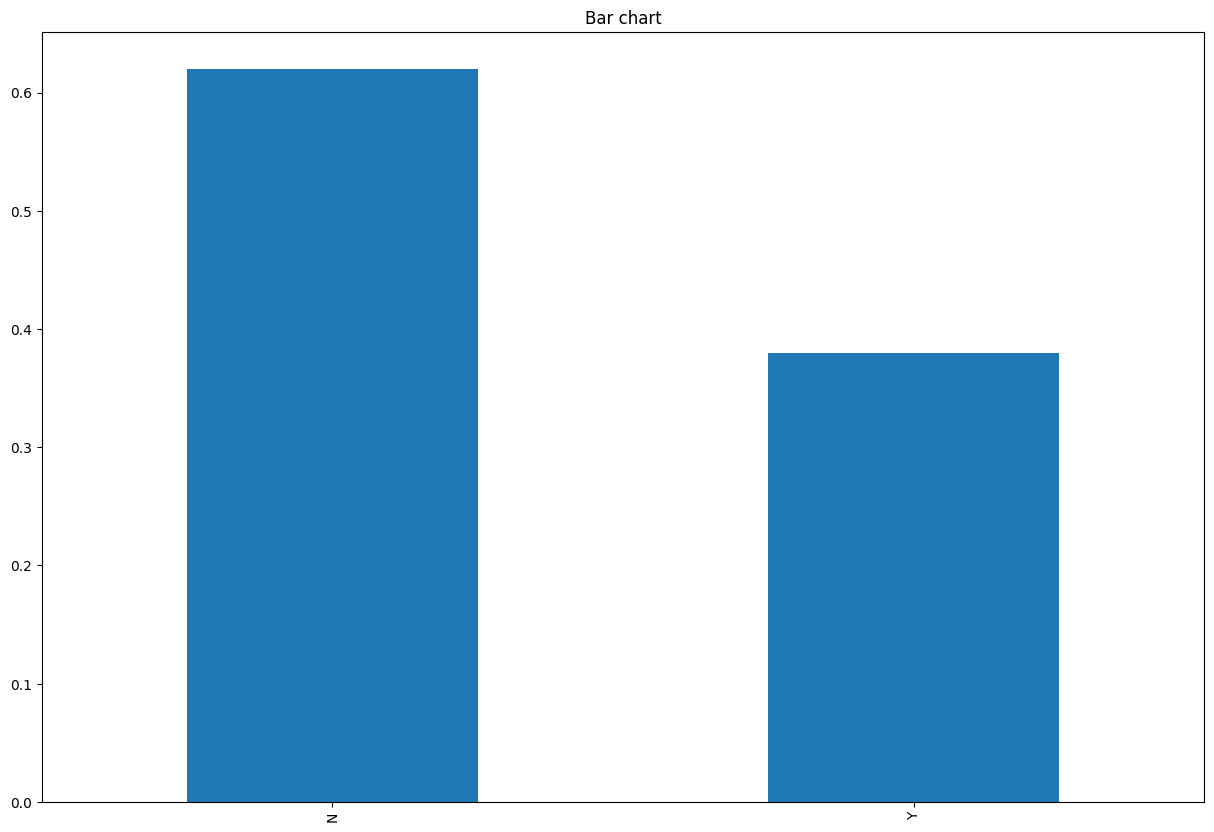

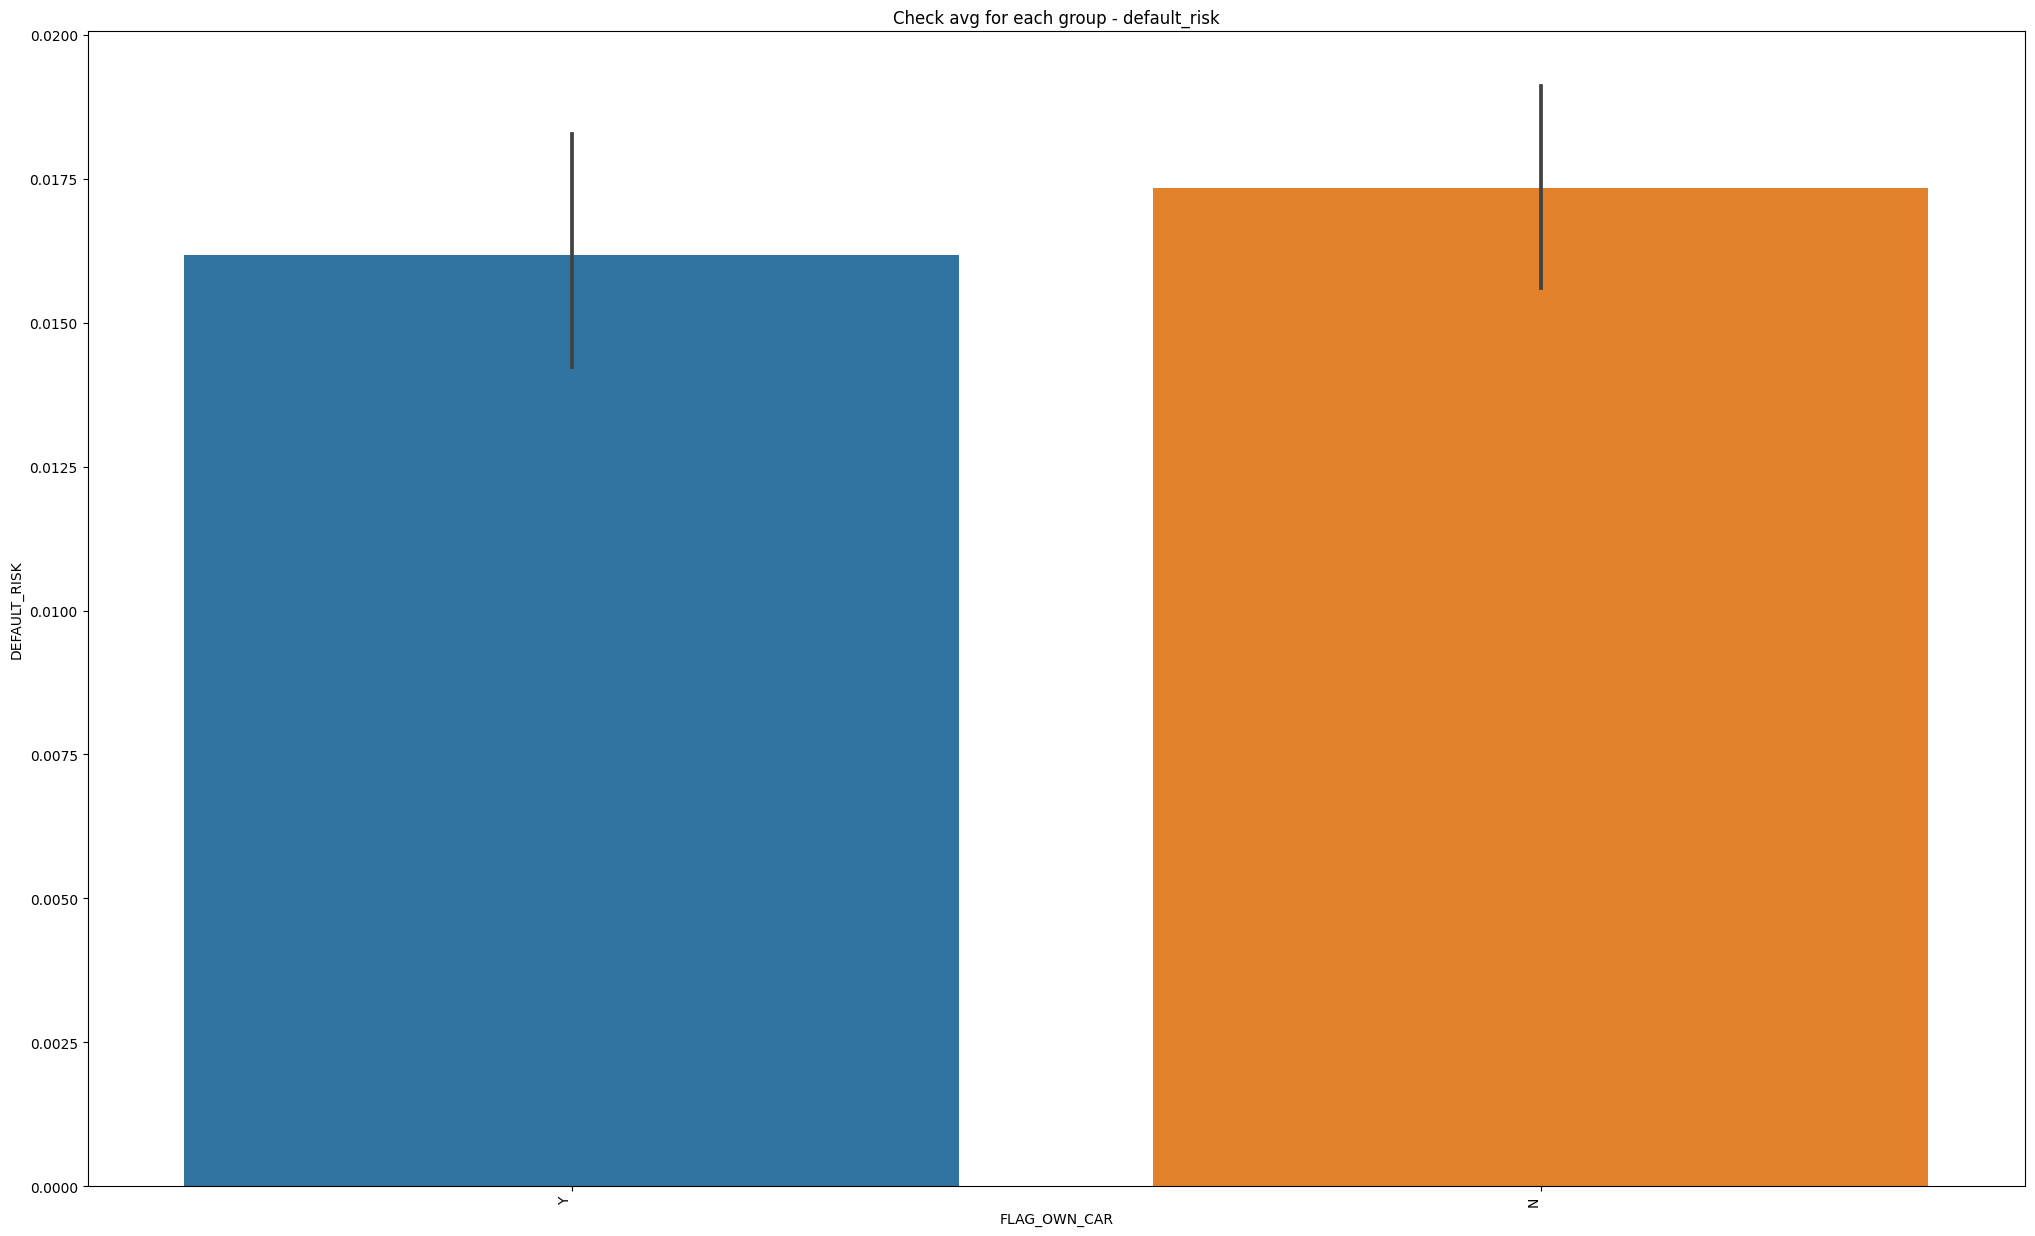

In [ ]:
nominal_des(credit_df,'FLAG_OWN_CAR','DEFAULT_RISK')

In [ ]:
own_car = test_chi(credit_df,'FLAG_OWN_CAR','DEFAULT_RISK')

Null Hypothesis (Ho): variables FLAG_OWN_CAR and DEFAULT_RISK are independent 
Alternative Hypothesis (Ha): variables aren't independent

Contingency Table
DEFAULT_RISK      0    1
FLAG_OWN_CAR            
N             22222  392
Y             13619  224

Alpha=0.050, p=0.431
Independent (fail to reject H0) p-value>alpha


#### **Analysis**

Assuming that "N" stands for no and "Y" stands for yes, it looks like non car owners tend to have higher credit default risk than car owners.

The variables ```FLAG_OWN_CAR``` and ```DEFAULT_RISK``` are independent.

The variables are independent because their p-value is higher than the alpha of 0.05; hence, the Cramer's V test was not applied.


#### **Conclusion**

It's common to own a car, so it might not be a risk factor.

**This variable should not be considered for modelling.**


### `FLAG_OWN_REALTY`

If a client owns a property.

Percentage value of the column:
Y    0.672189
N    0.327811
Name: FLAG_OWN_REALTY, dtype: float64

Quantitative value of the column:
Y    24506
N    11951
Name: FLAG_OWN_REALTY, dtype: int64



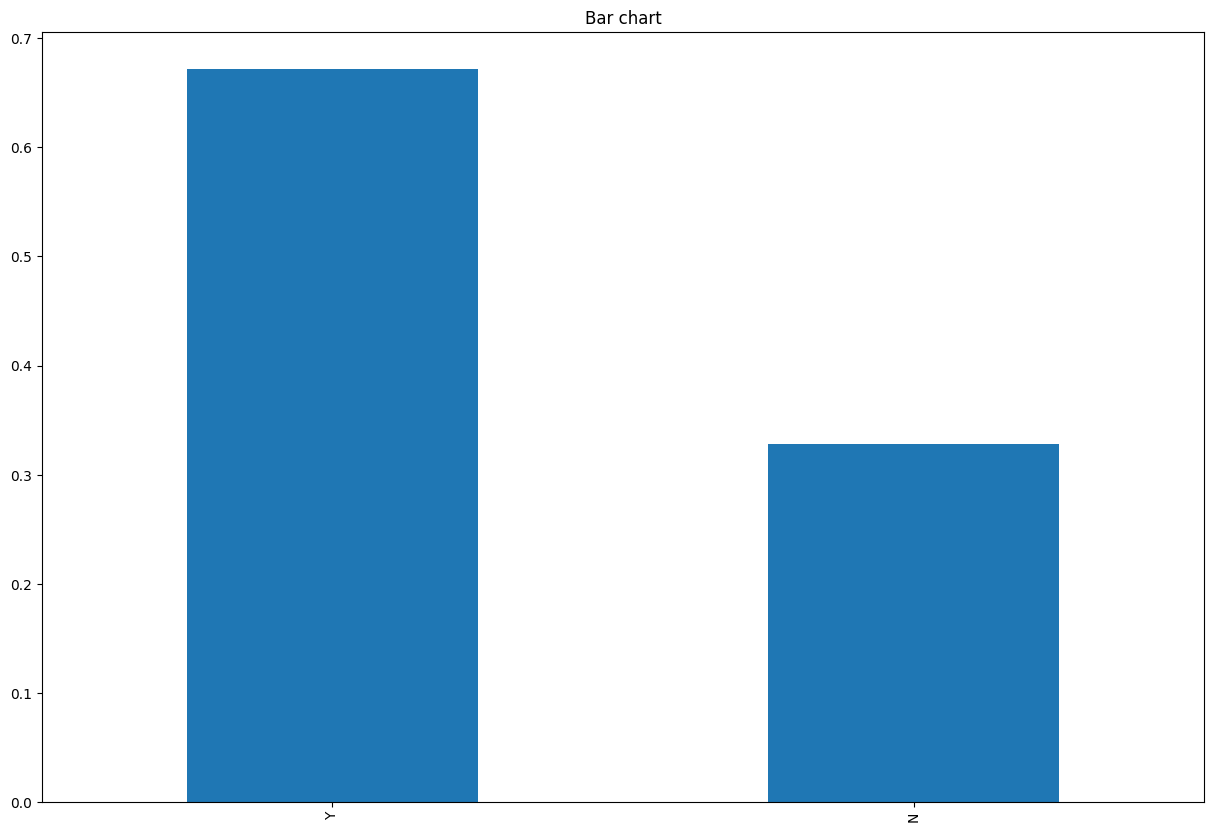

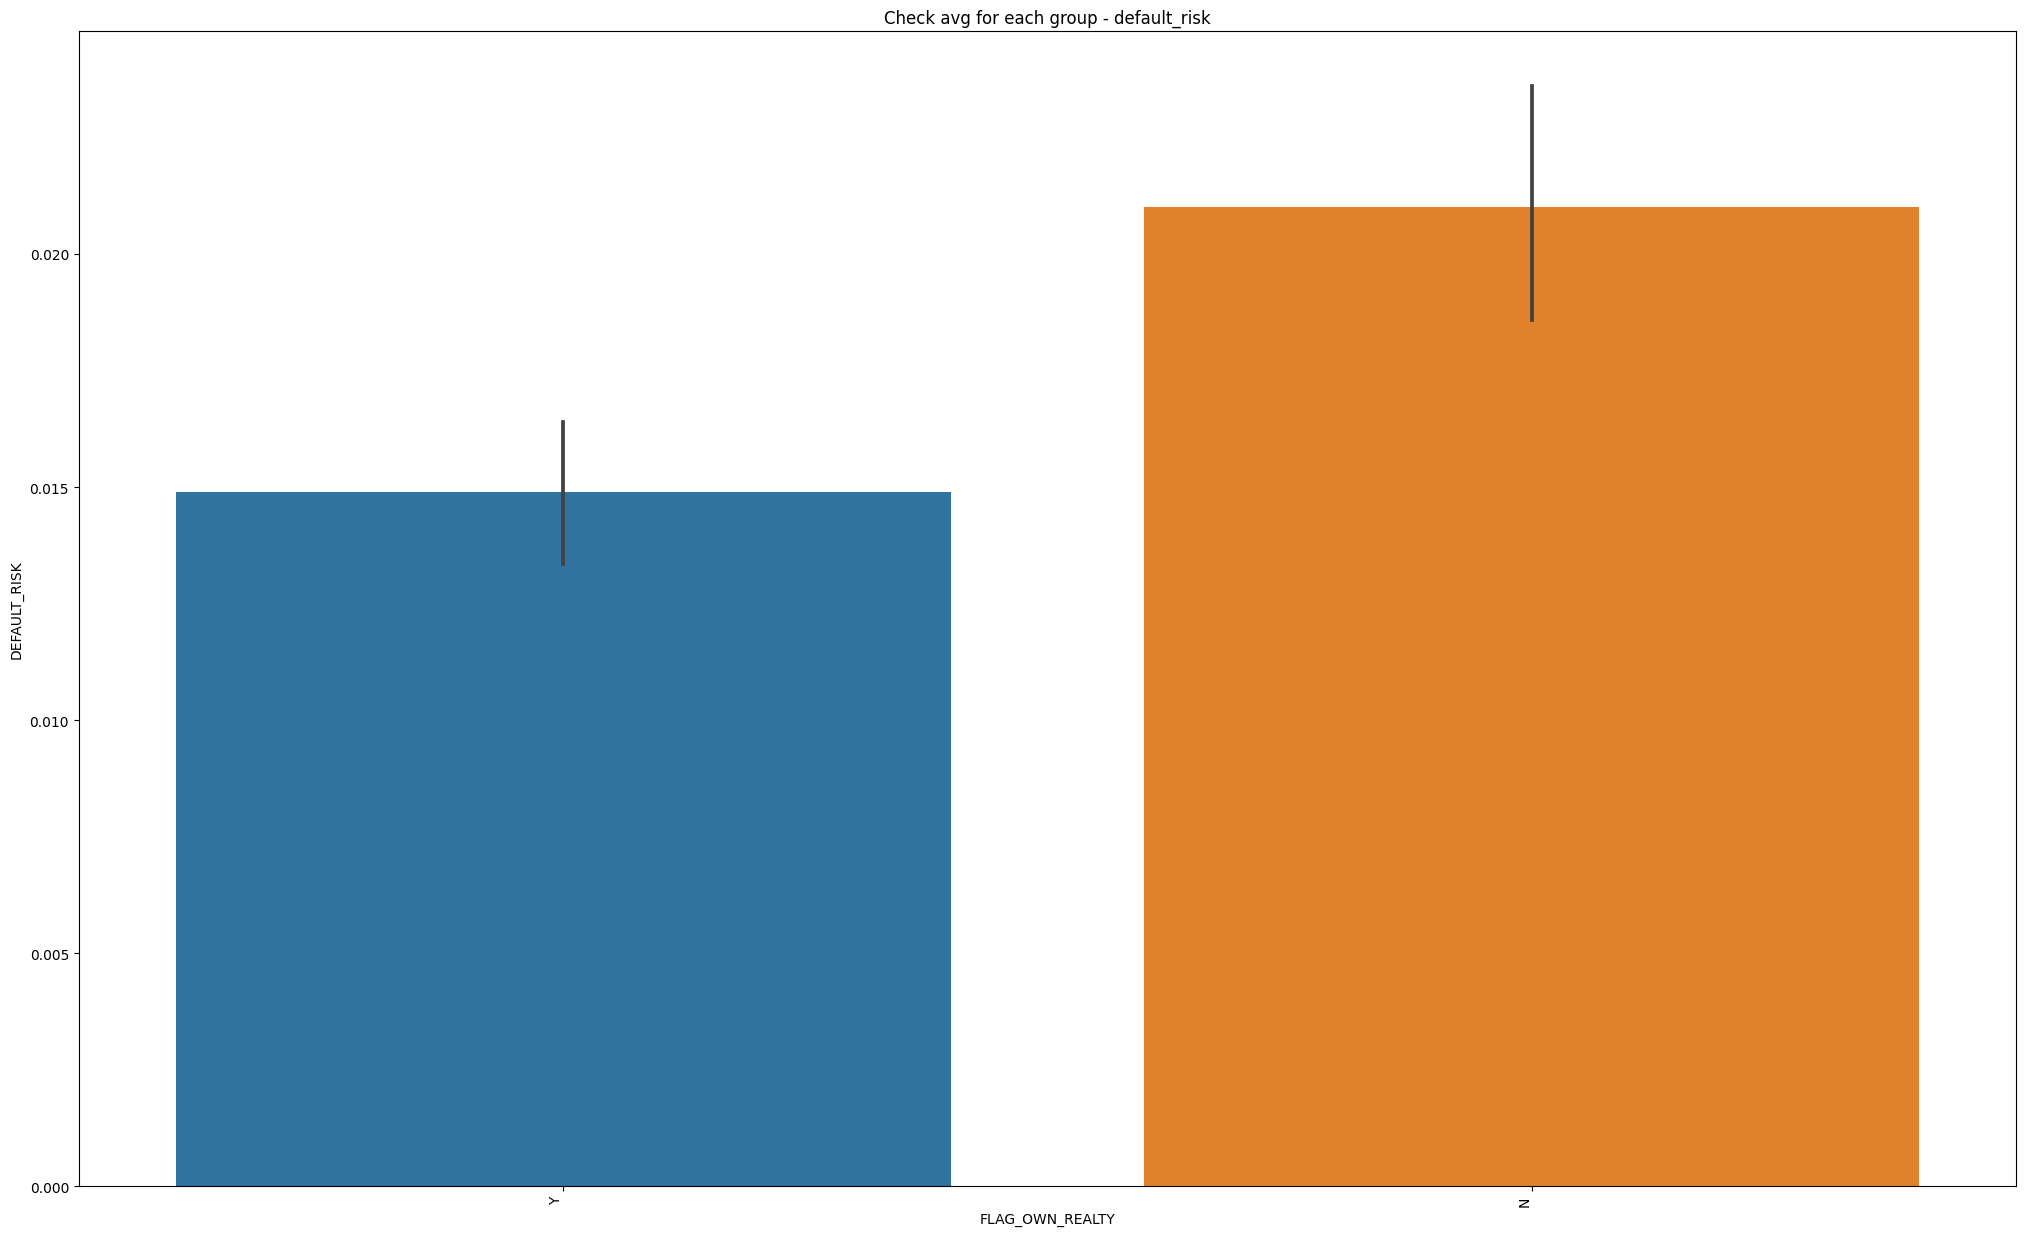

In [ ]:
nominal_des(credit_df,'FLAG_OWN_REALTY','DEFAULT_RISK' )

In [ ]:
own_realty = test_chi(credit_df,'FLAG_OWN_REALTY','DEFAULT_RISK')

Null Hypothesis (Ho): variables FLAG_OWN_REALTY and DEFAULT_RISK are independent 
Alternative Hypothesis (Ha): variables aren't independent

Contingency Table
DEFAULT_RISK         0    1
FLAG_OWN_REALTY            
N                11700  251
Y                24141  365

Alpha=0.050, p=0.000
Dependent (reject H0) p-value < alpha


In [ ]:
cramers_v(own_realty)

V = 0.022019985902688603
Cramer's V Degrees of Freedom = 1

   DoF  Small  Medium  Large
0  1.0   0.10    0.30   0.50
1  2.0   0.07    0.21   0.35
2  3.0   0.06    0.17   0.29
3  4.0   0.05    0.15   0.25
4  5.0   0.04    0.13   0.22


#### **Analysis**

It looks like non-property owners tend to have a higher credit default risk than property owners.

The variables ```FLAG_OWN_REALTY``` and ```DEFAULT_RISK``` are dependent, as the p-value is smaller than 0.05: I reject the null hypothesis.

When the Cramer's V test is applied I've checked that ```FLAG_OWN_CAR``` has negligible, statistically effect on ```DEFAULT_RISK```.


#### **Conclusion**

Does it make sense? It does make sense. Property owners can have more funds to pay the credit than those who don't own a property (who also might not have a financial condition to own one).

**This variable shoul be considered for modelling.**

### `NAME_INCOME_TYPE`

The applicant's income category.

Percentage value of the column:
Working                 0.516197
Commercial associate    0.232877
Pensioner               0.168747
State servant           0.081877
Student                 0.000302
Name: NAME_INCOME_TYPE, dtype: float64

Quantitative value of the column:
Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: NAME_INCOME_TYPE, dtype: int64



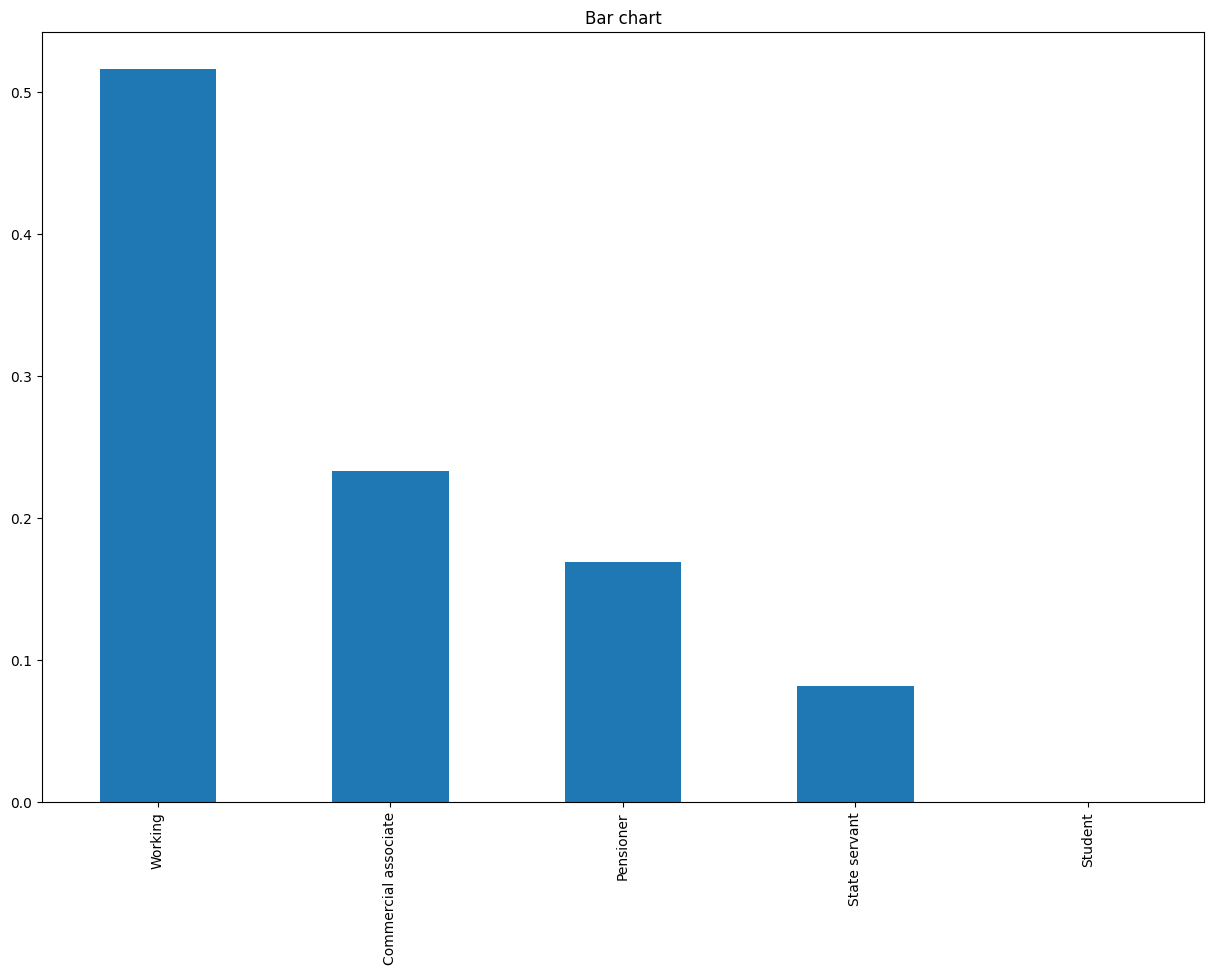

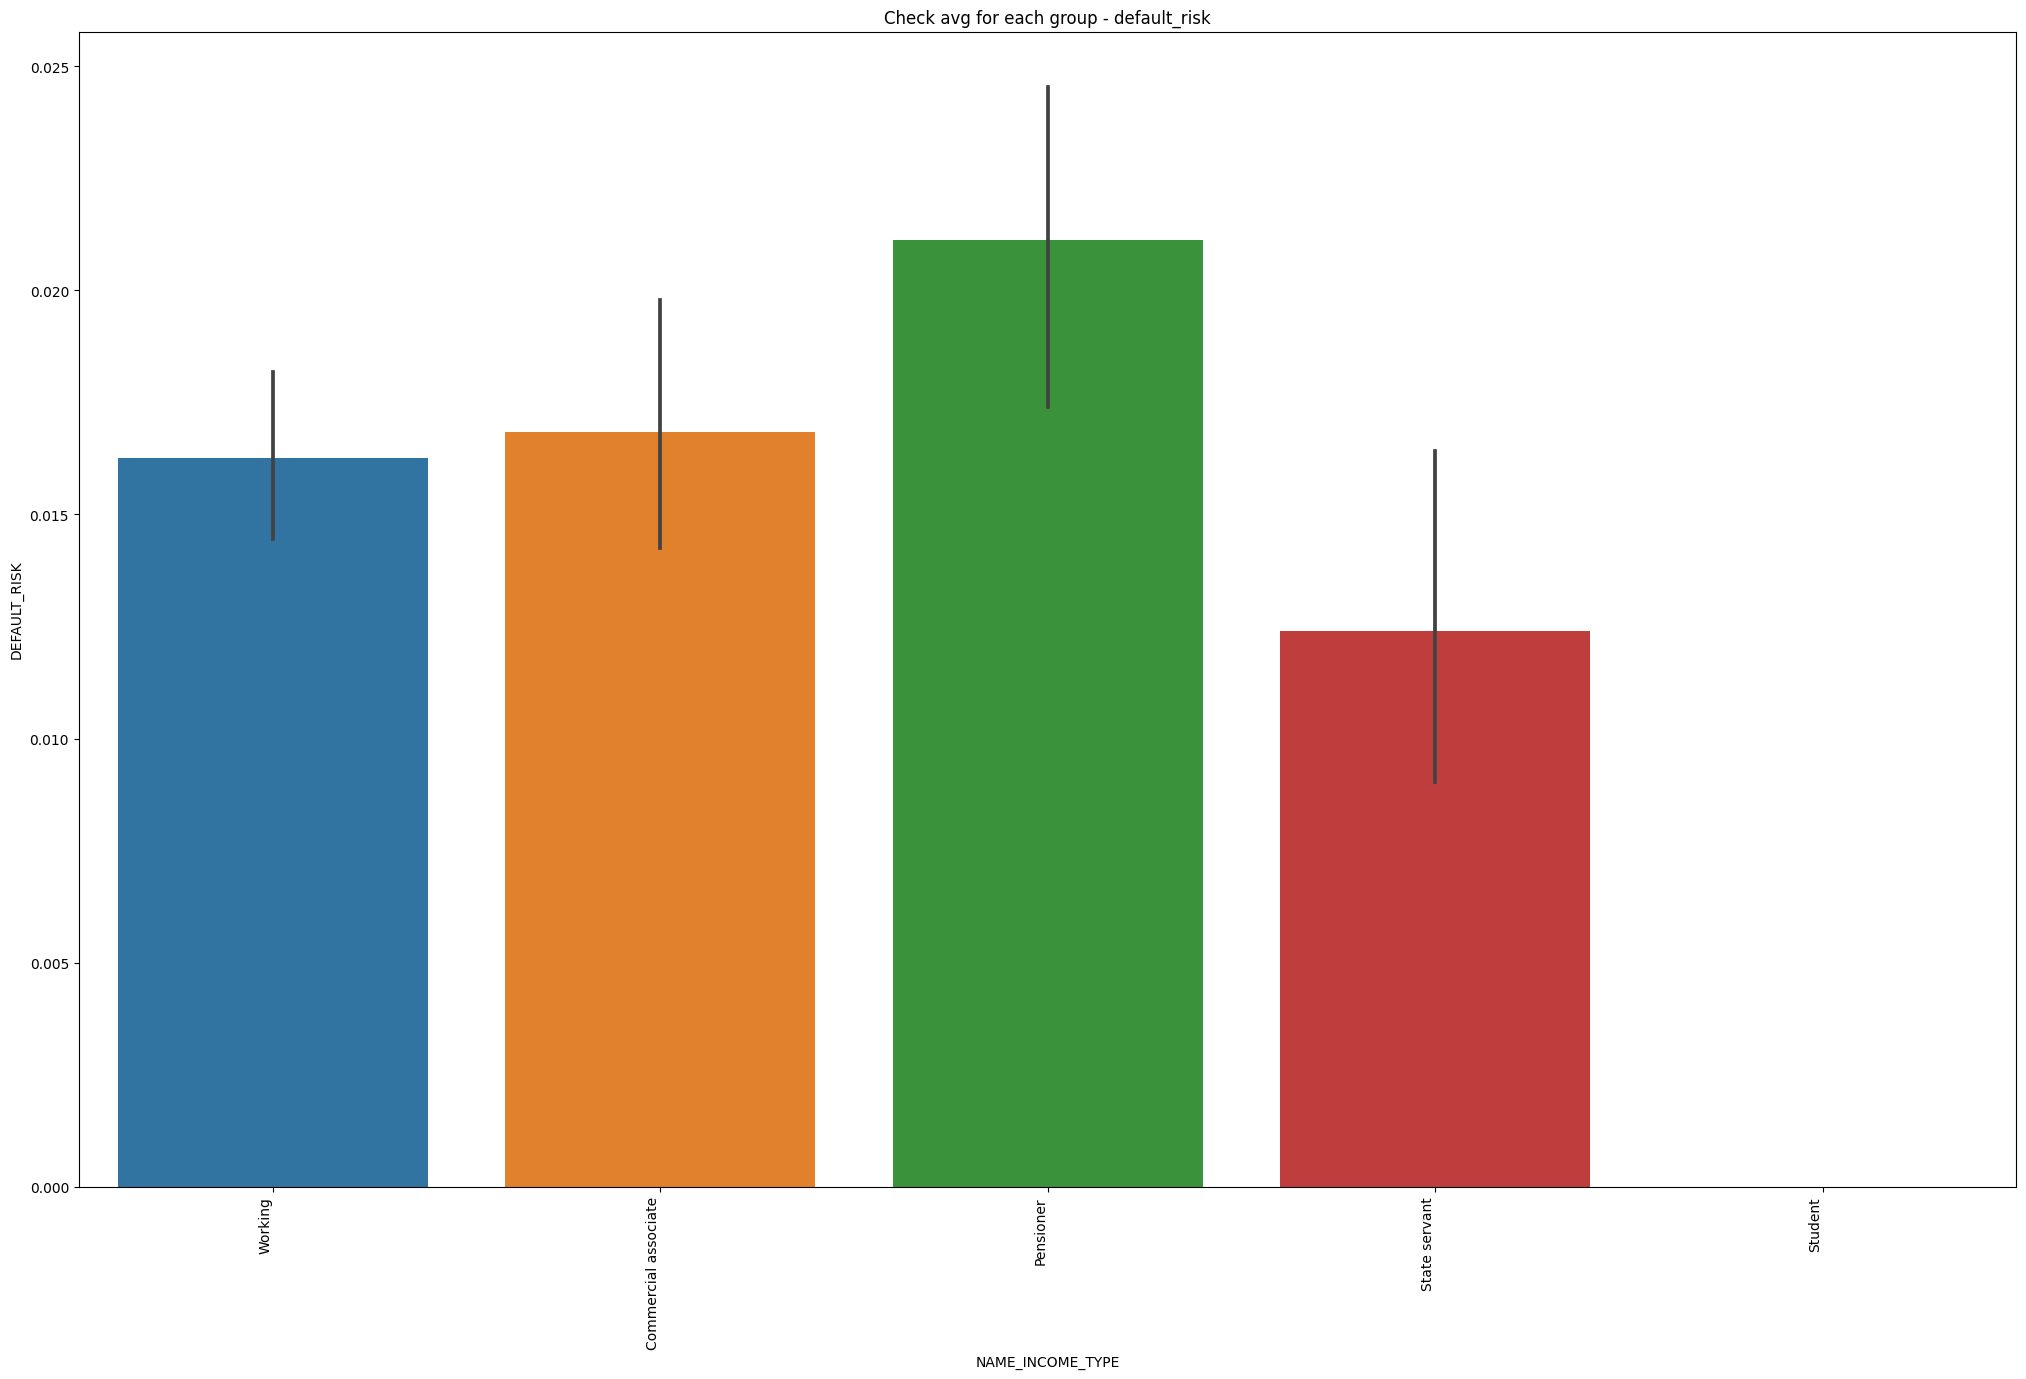

In [ ]:
nominal_des(credit_df,'NAME_INCOME_TYPE','DEFAULT_RISK')

In [ ]:
income_type = test_chi(credit_df,'NAME_INCOME_TYPE','DEFAULT_RISK')

Null Hypothesis (Ho): variables NAME_INCOME_TYPE and DEFAULT_RISK are independent 
Alternative Hypothesis (Ha): variables aren't independent

Contingency Table
DEFAULT_RISK              0    1
NAME_INCOME_TYPE                
Commercial associate   8347  143
Pensioner              6022  130
State servant          2948   37
Student                  11    0
Working               18513  306

Alpha=0.050, p=0.027
Dependent (reject H0) p-value < alpha


In [ ]:
cramers_v(income_type)

V = 0.017316434007565613
Cramer's V Degrees of Freedom = 1

   DoF  Small  Medium  Large
0  1.0   0.10    0.30   0.50
1  2.0   0.07    0.21   0.35
2  3.0   0.06    0.17   0.29
3  4.0   0.05    0.15   0.25
4  5.0   0.04    0.13   0.22


#### **Analysis**

There are a total of 5 income type categories, being ```Student``` a very rare one.

It seems that pensioners have much higher credit default risk and state servants have the lowest default risk. It does make sense, as state servants tend to have stable jobs and pensioners don't have many ways to increase their income to pay for credit.

The variables ```NAME_INCOME_TYPE``` e ```DEFAULT_RISK``` are dependent with a negligible effect size.

#### **Conclusion**

It looks like the type of income tens to matter more than the amount itself.

**This variable should be considered for modelling.**


### `NAME_EDUCATION_TYPE`

The applicant's education level.

Percentage value of the column:
Secondary / secondary special    0.679623
Higher education                 0.270565
Incomplete higher                0.038676
Lower secondary                  0.010259
Academic degree                  0.000878
Name: NAME_EDUCATION_TYPE, dtype: float64

Quantitative value of the column:
Secondary / secondary special    24777
Higher education                  9864
Incomplete higher                 1410
Lower secondary                    374
Academic degree                     32
Name: NAME_EDUCATION_TYPE, dtype: int64



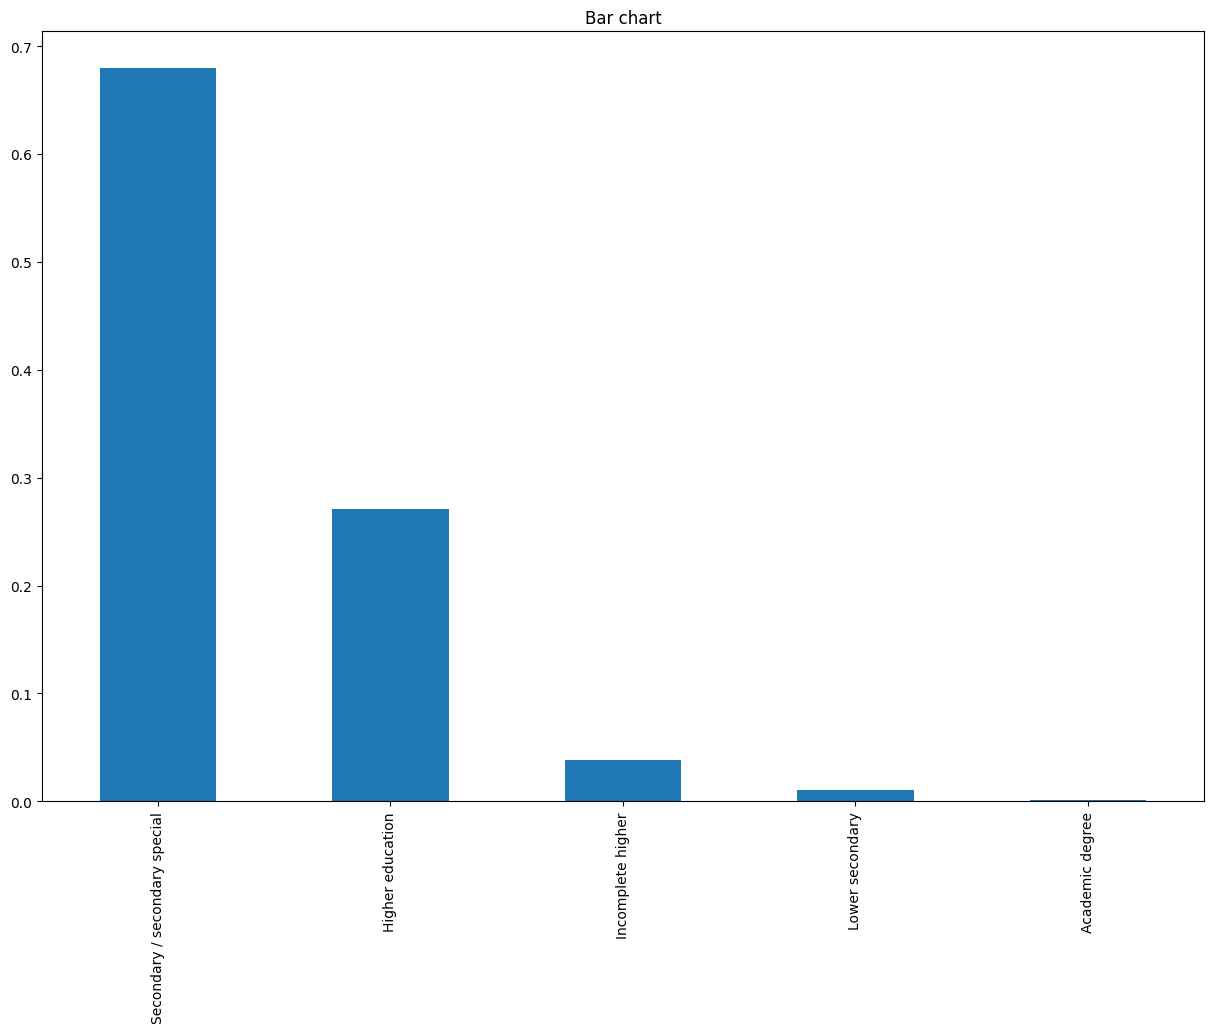

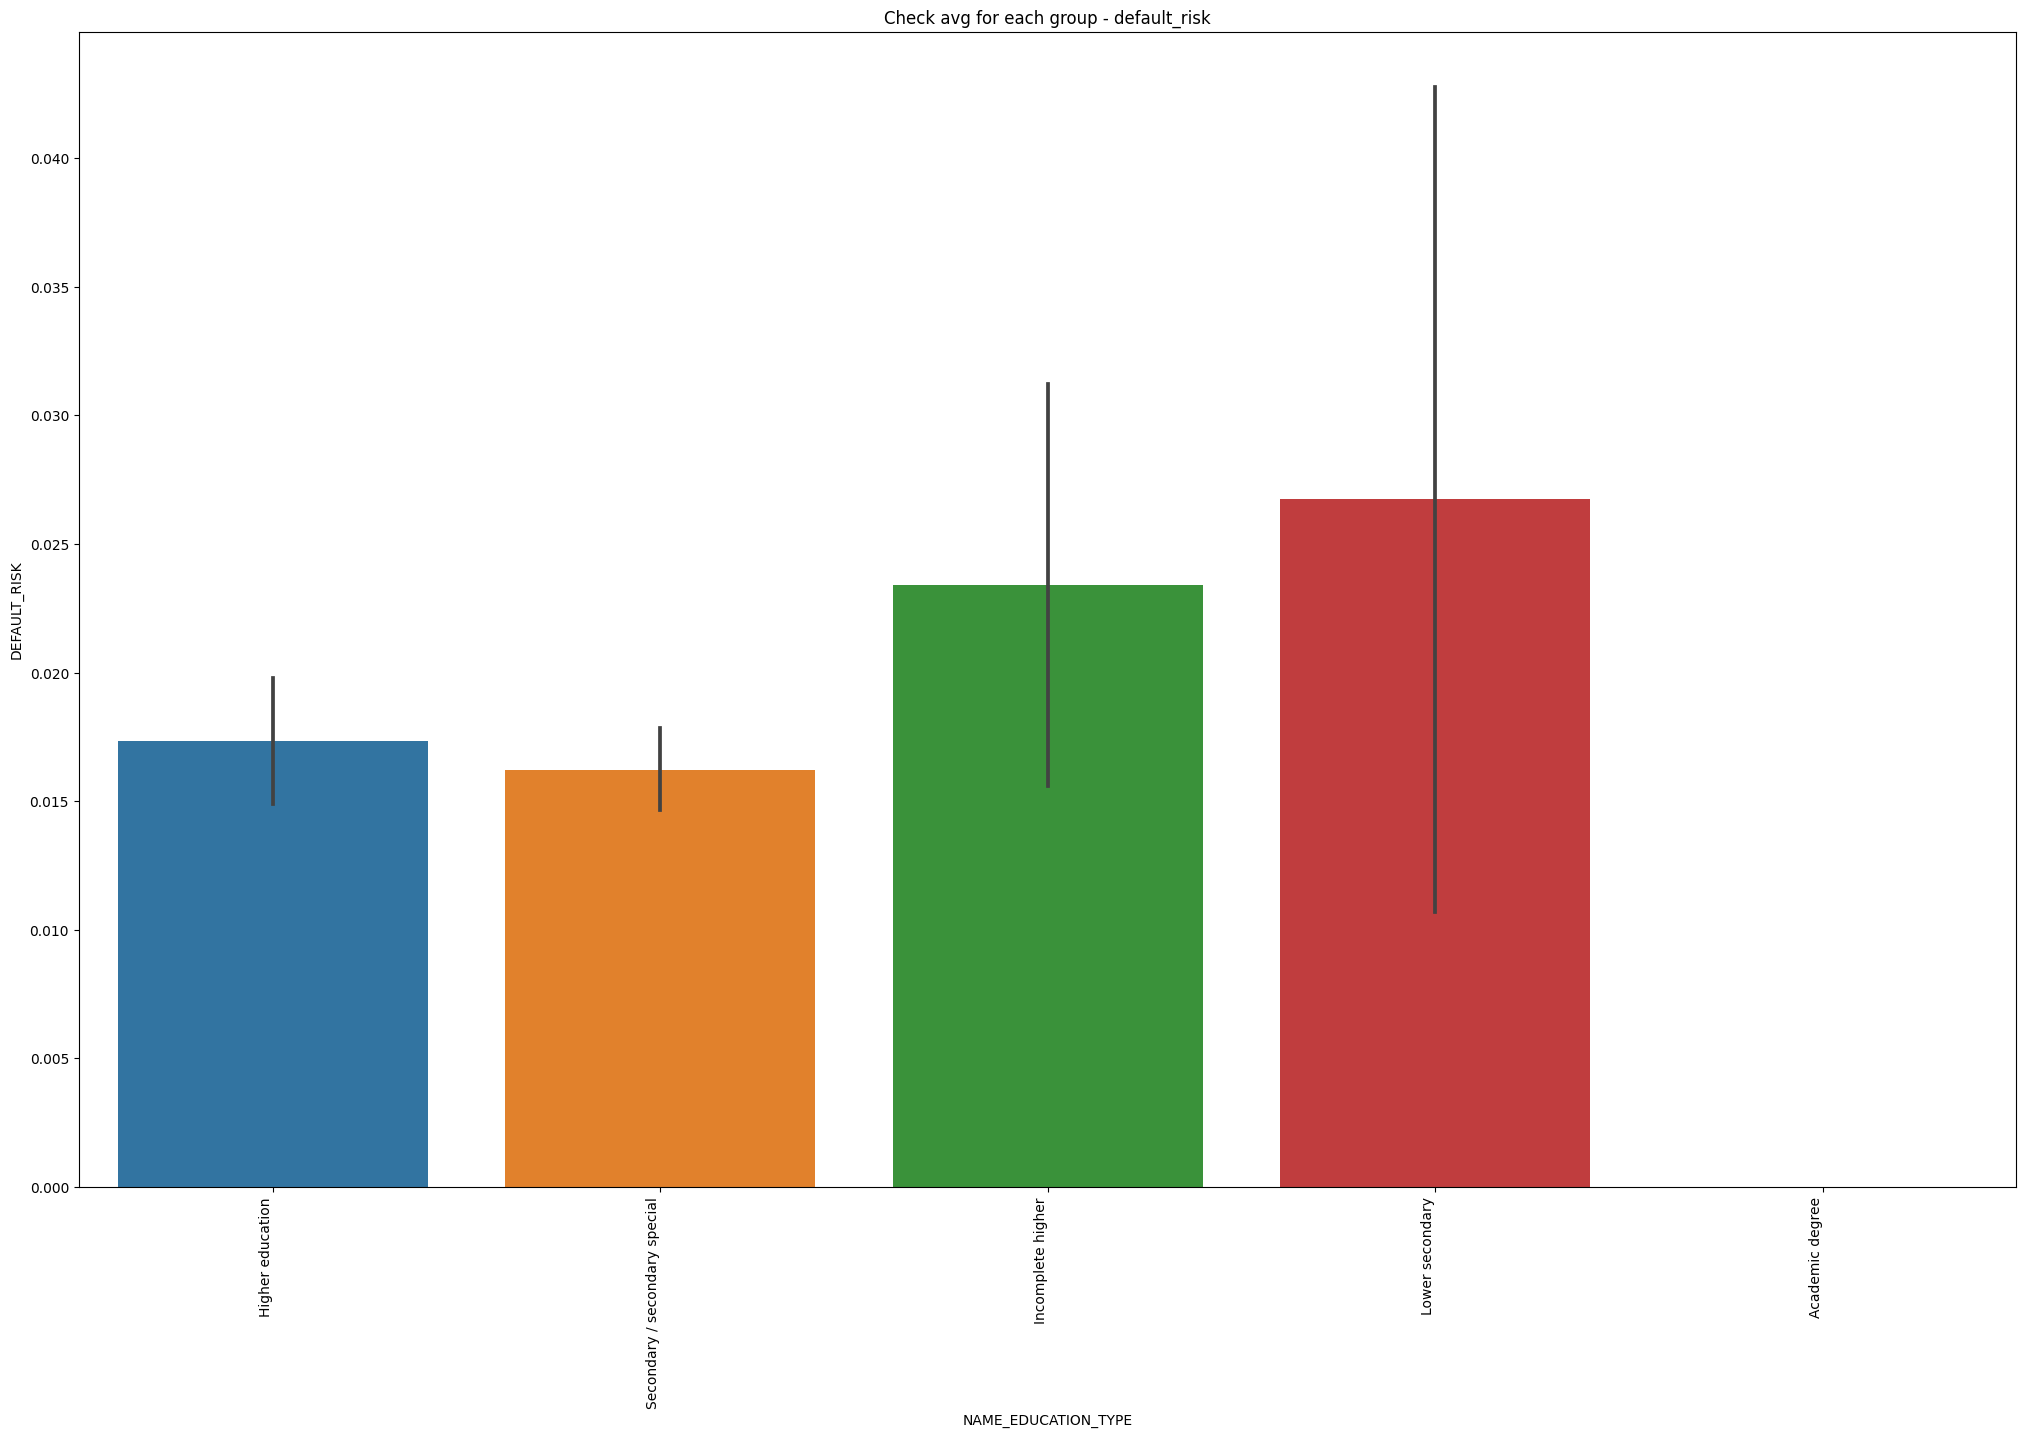

In [ ]:
nominal_des(credit_df,'NAME_EDUCATION_TYPE','DEFAULT_RISK')

In [ ]:
education_type = test_chi(credit_df,'NAME_EDUCATION_TYPE','DEFAULT_RISK')

Null Hypothesis (Ho): variables NAME_EDUCATION_TYPE and DEFAULT_RISK are independent 
Alternative Hypothesis (Ha): variables aren't independent

Contingency Table
DEFAULT_RISK                       0    1
NAME_EDUCATION_TYPE                      
Academic degree                   32    0
Higher education                9693  171
Incomplete higher               1377   33
Lower secondary                  364   10
Secondary / secondary special  24375  402

Alpha=0.050, p=0.130
Independent (fail to reject H0) p-value>alpha


#### **Analysis**

There a total of 5 possible education levels, being ```Academic degree``` a very rare one, followed by ```Lower secondary```.

The variables ```NAME_EDUCATION_TYPE``` and ```DEFAULT_RISK``` are independent.




#### **Conclusion**

It somewhat makes sense in a way that is possible to imagine that certain education levels can lead to very different capacities for paying credit. Looking at the data, the ones with larger default risk are also the ones with smaller sample size. Also, the applicants with a secondary level of education make a very large parte of the sample (around 66%).


**This variable shouldn't be considered for modelling.**

### `NAME_FAMILY_STATUS`

The applicant's marital status.

Percentage value of the column:
Married                 0.687056
Single / not married    0.132457
Civil marriage          0.080780
Separated               0.057684
Widow                   0.042022
Name: NAME_FAMILY_STATUS, dtype: float64

Quantitative value of the column:
Married                 25048
Single / not married     4829
Civil marriage           2945
Separated                2103
Widow                    1532
Name: NAME_FAMILY_STATUS, dtype: int64



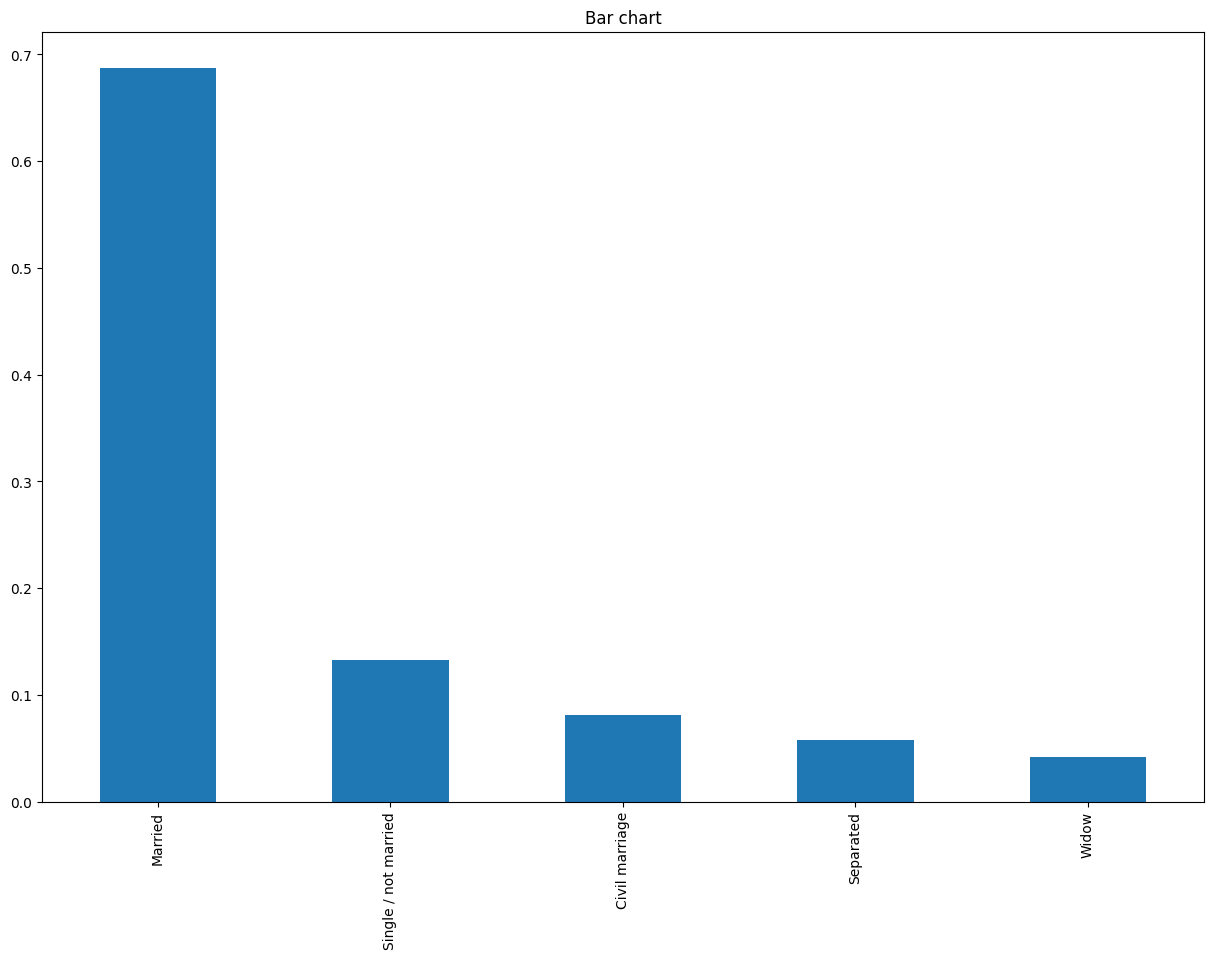

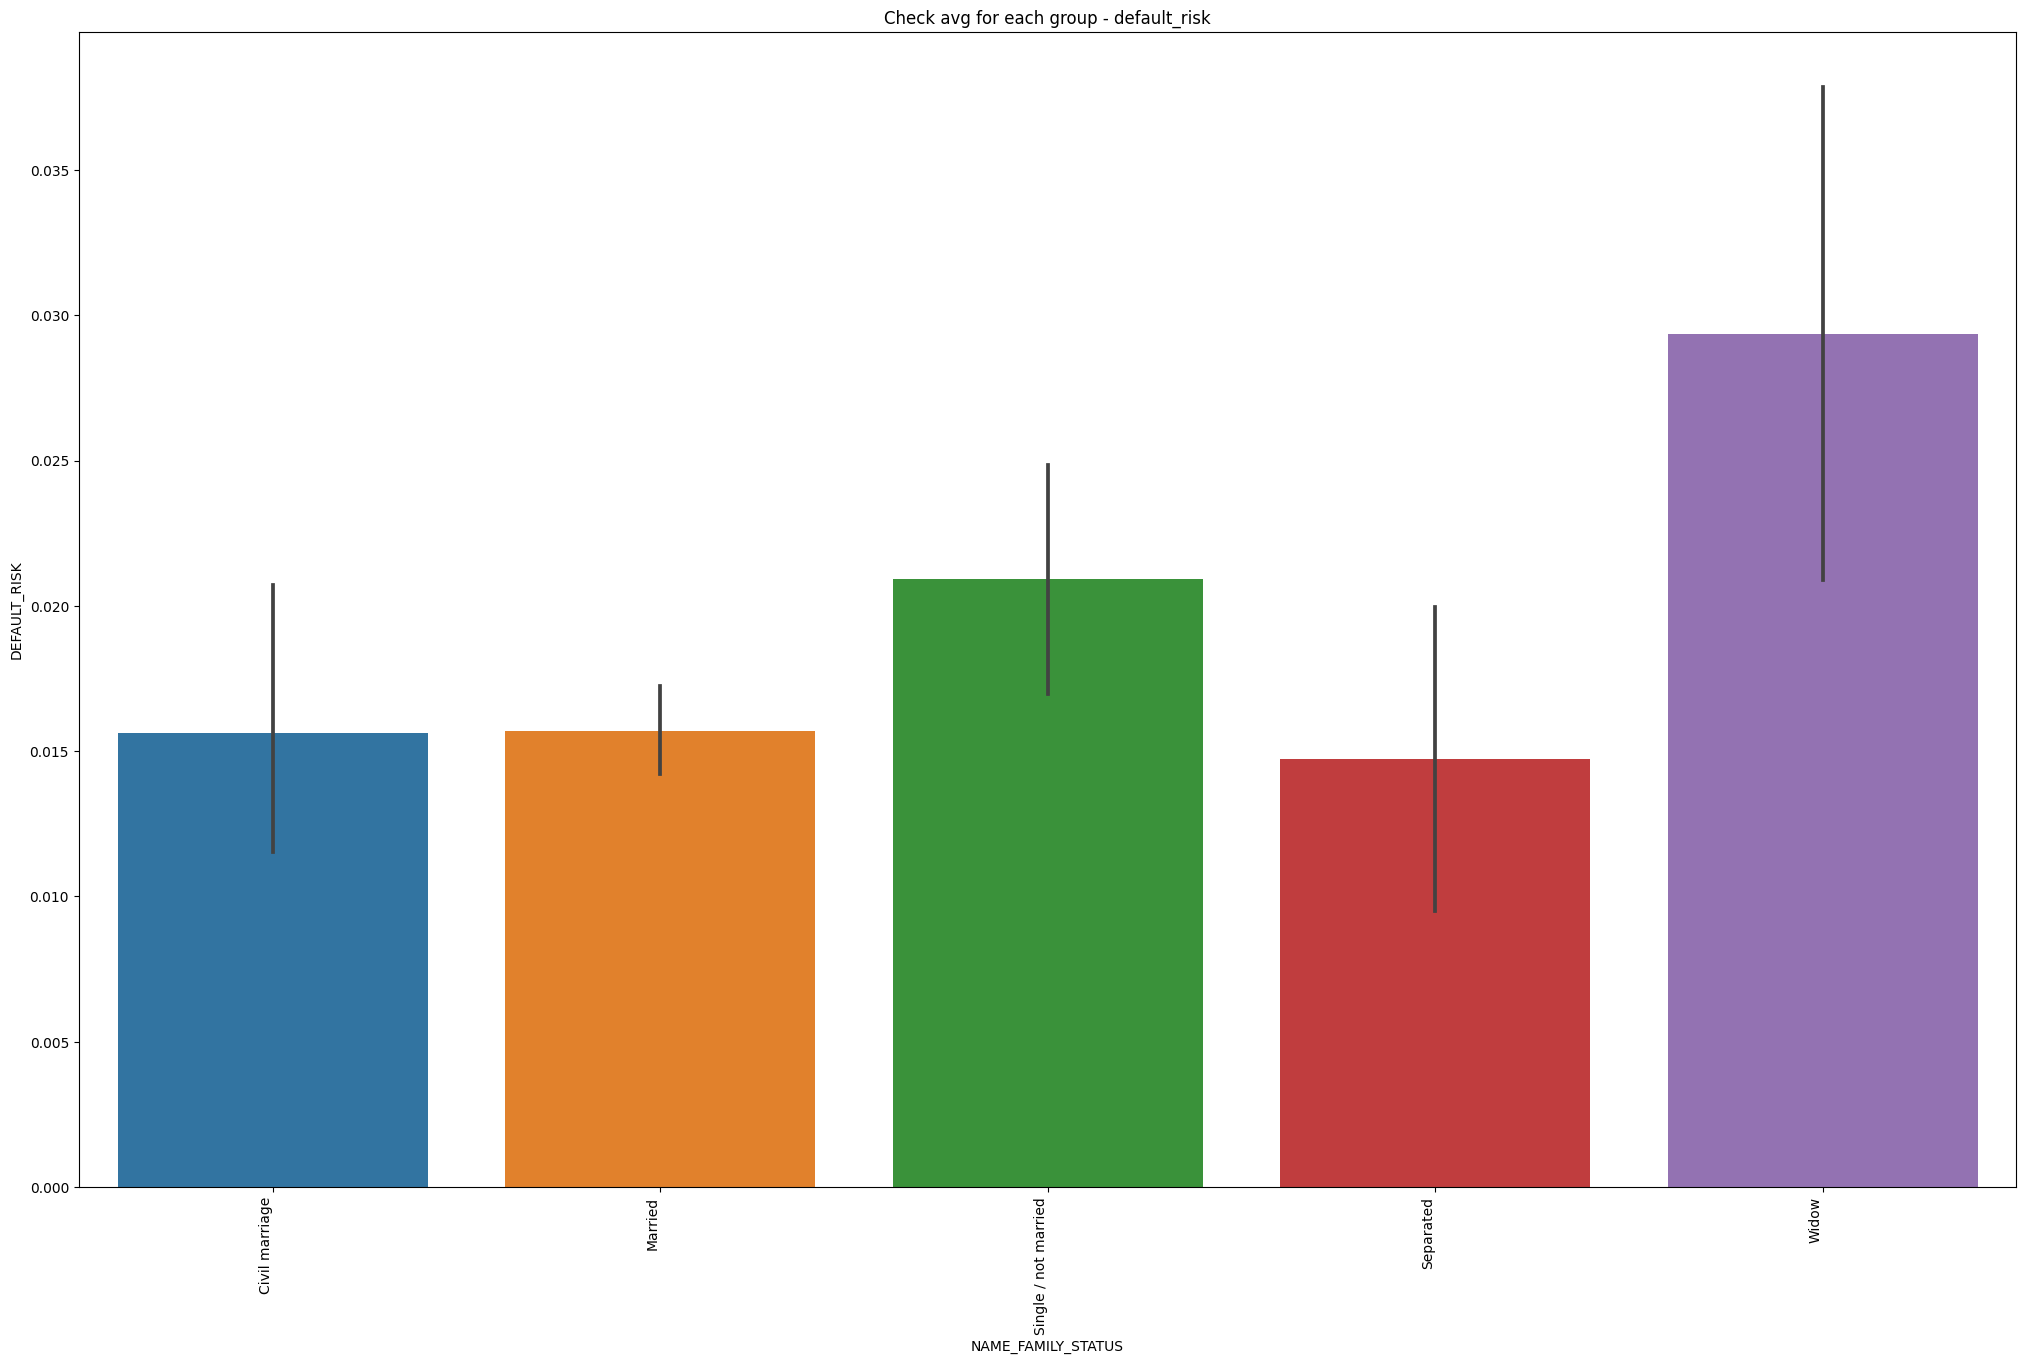

In [ ]:
nominal_des(credit_df,'NAME_FAMILY_STATUS','DEFAULT_RISK')

In [ ]:
family_status = test_chi(credit_df,'NAME_FAMILY_STATUS','DEFAULT_RISK')

Null Hypothesis (Ho): variables NAME_FAMILY_STATUS and DEFAULT_RISK are independent 
Alternative Hypothesis (Ha): variables aren't independent

Contingency Table
DEFAULT_RISK              0    1
NAME_FAMILY_STATUS              
Civil marriage         2899   46
Married               24655  393
Separated              2072   31
Single / not married   4728  101
Widow                  1487   45

Alpha=0.050, p=0.000
Dependent (reject H0) p-value < alpha


In [ ]:
cramers_v(family_status)

V = 0.02463501190562218
Cramer's V Degrees of Freedom = 1

   DoF  Small  Medium  Large
0  1.0   0.10    0.30   0.50
1  2.0   0.07    0.21   0.35
2  3.0   0.06    0.17   0.29
3  4.0   0.05    0.15   0.25
4  5.0   0.04    0.13   0.22


#### **Analysis**

There ara a total of 5 maritual status, being ```Married``` the most common one, accounting for around 68% of the sample size.

It looks like the single applicants have a higher default risk in comparison to the remaining groups. It's also the second most common marital status, which could mean that there could be some signal here. Widows also have a much larger default risk, but we should remember that it's tje lesse frequent marital status.

The variables ```NAME_FAMILY_STATUS``` and ```DEFAULT_RISK``` are dependent and have a negligible and significant effect size.

#### **Conclusion**

Married applicants need to have more responsability in their decisions as they impact their family, whilst single people have more freedom to make risky decisions.

**This variable should be considered for modelling.**


### `NAME_HOUSING_TYPE`

The applicant's type of house.

Percentage value of the column:
House / apartment      0.892778
With parents           0.048715
Municipal apartment    0.030941
Rented apartment       0.015772
Office apartment       0.007187
Co-op apartment        0.004608
Name: NAME_HOUSING_TYPE, dtype: float64

Quantitative value of the column:
House / apartment      32548
With parents            1776
Municipal apartment     1128
Rented apartment         575
Office apartment         262
Co-op apartment          168
Name: NAME_HOUSING_TYPE, dtype: int64



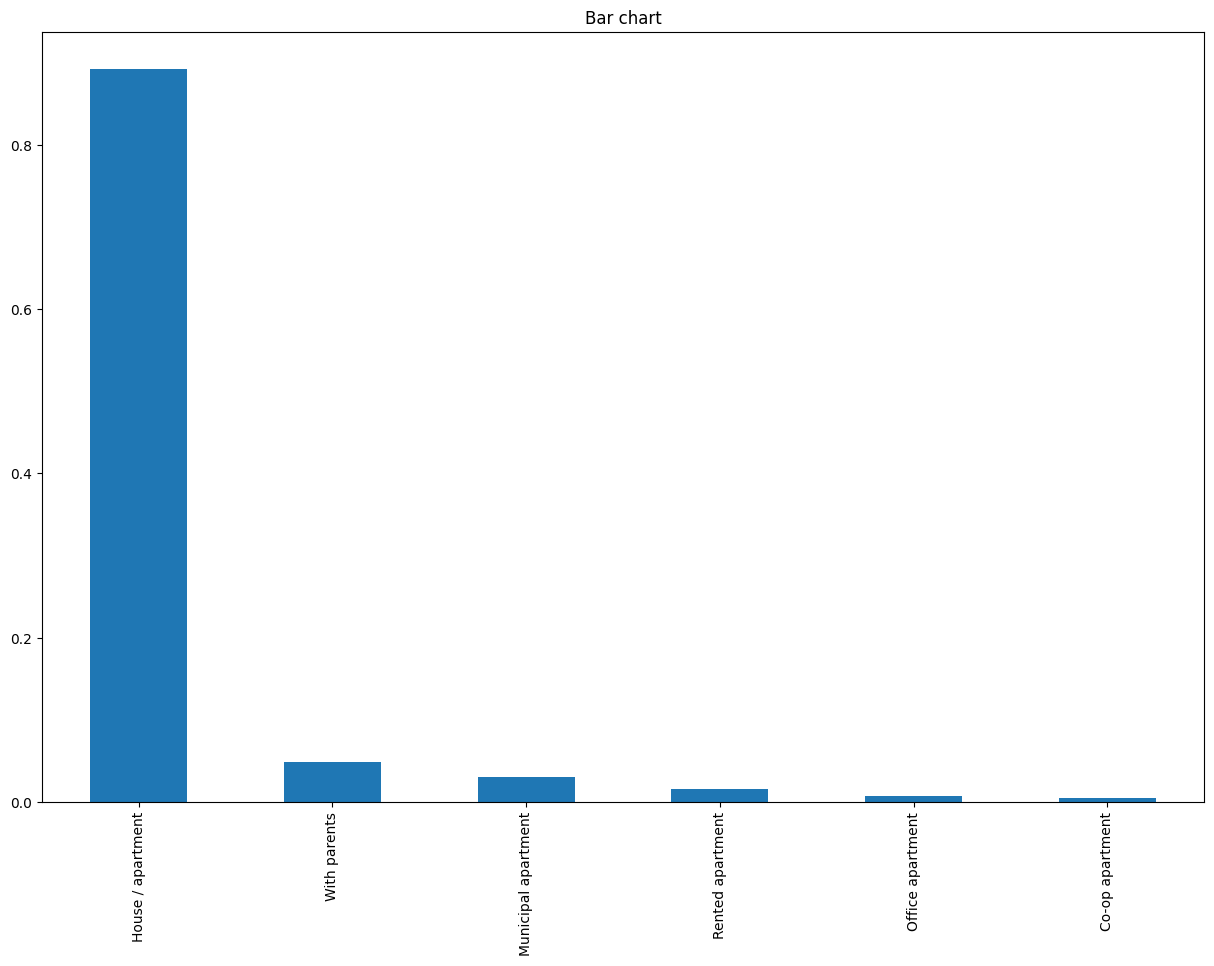

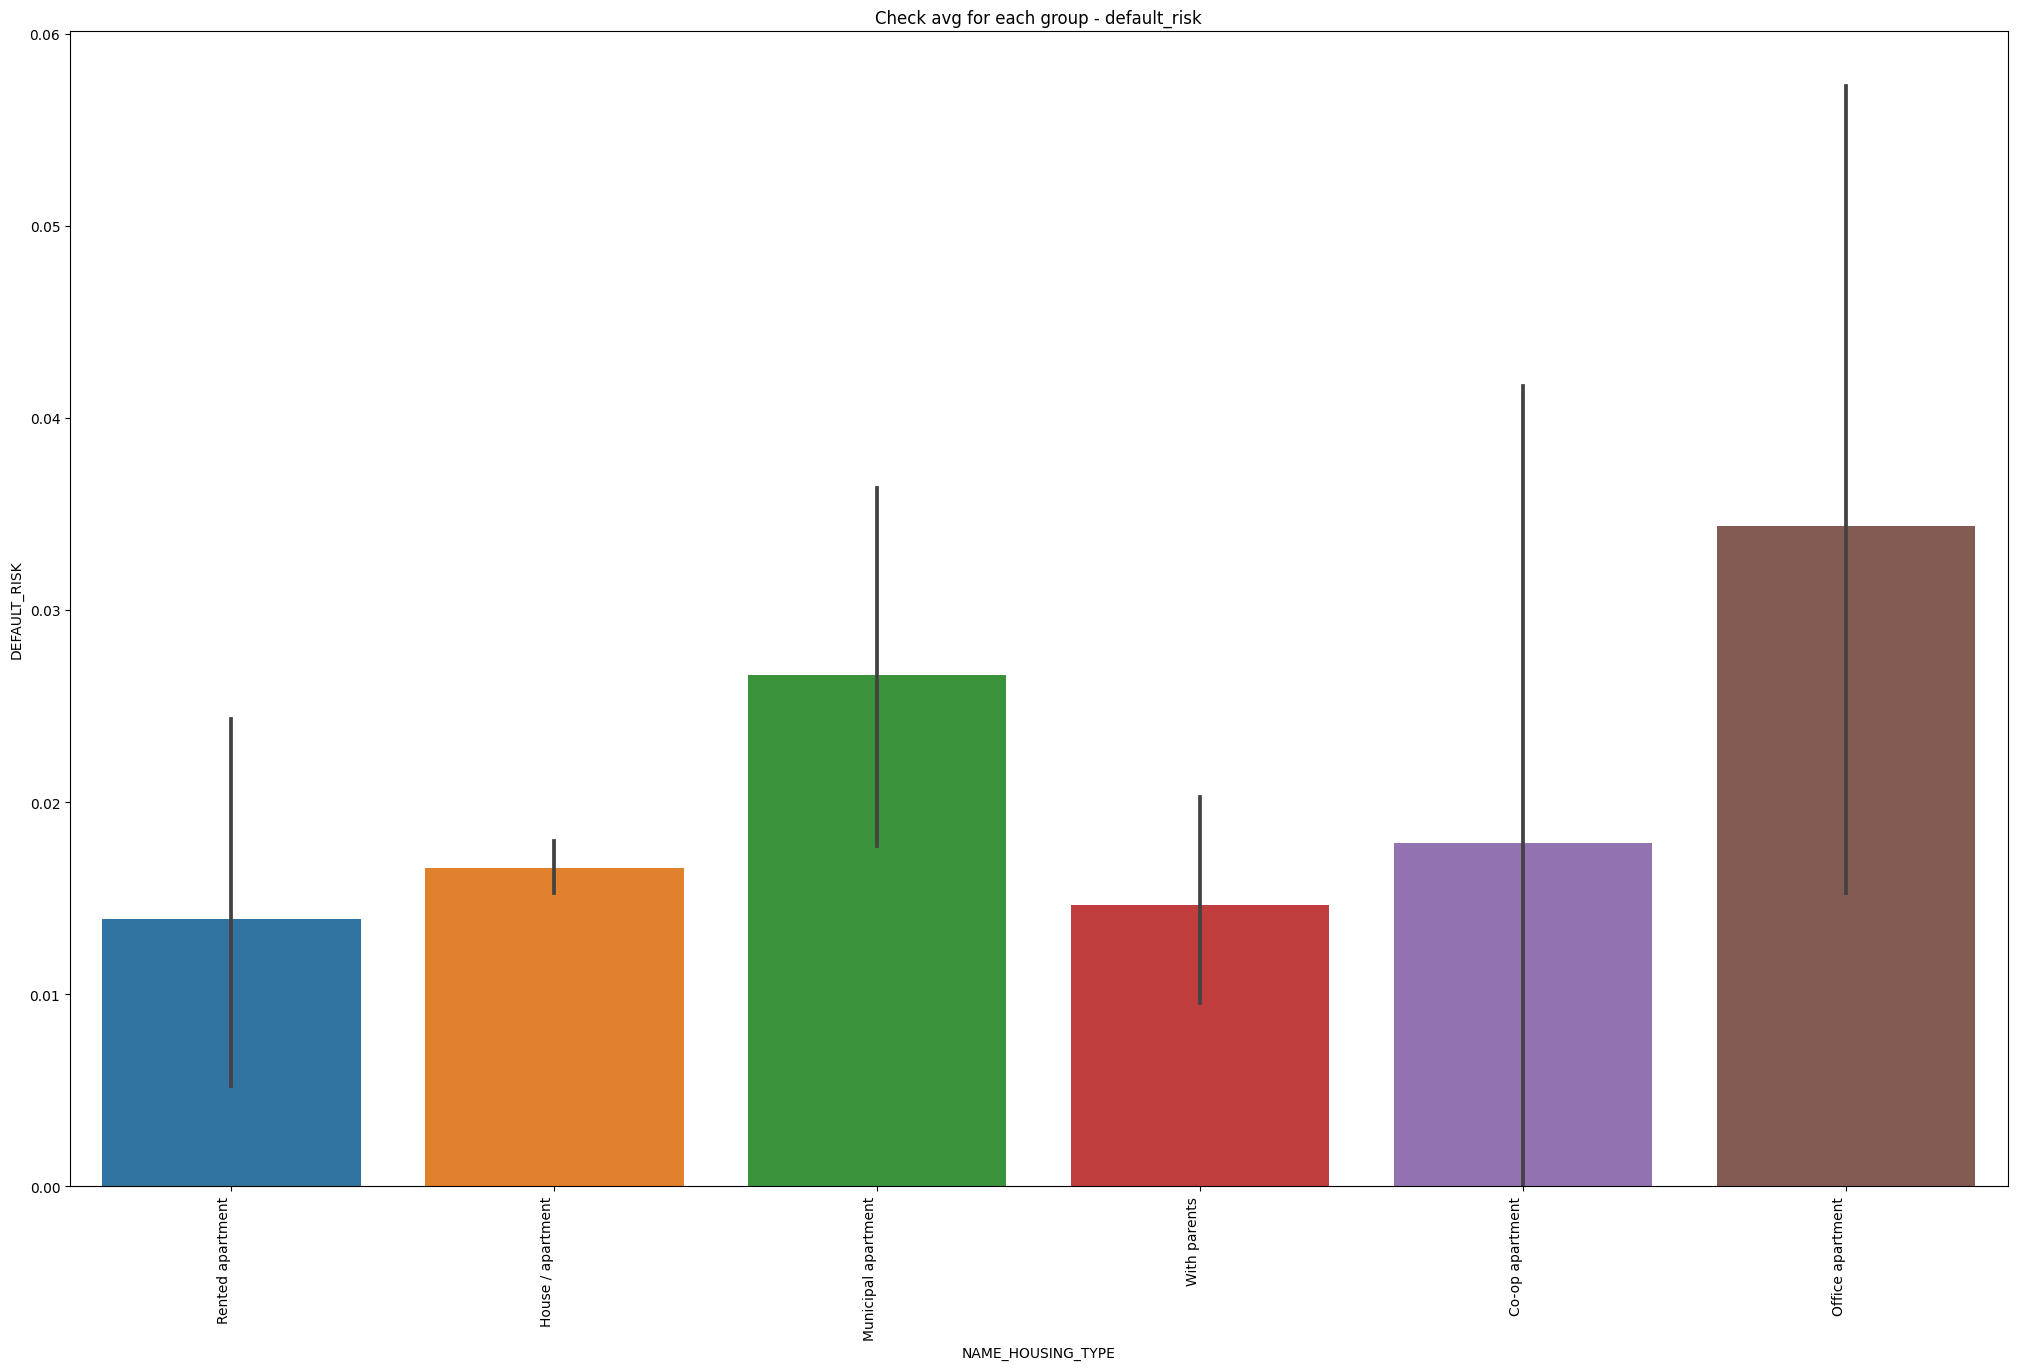

In [ ]:
nominal_des(credit_df,'NAME_HOUSING_TYPE','DEFAULT_RISK')

In [ ]:
house_type = test_chi(credit_df,'NAME_HOUSING_TYPE','DEFAULT_RISK')

Null Hypothesis (Ho): variables NAME_HOUSING_TYPE and DEFAULT_RISK are independent 
Alternative Hypothesis (Ha): variables aren't independent

Contingency Table
DEFAULT_RISK             0    1
NAME_HOUSING_TYPE              
Co-op apartment        165    3
House / apartment    32008  540
Municipal apartment   1098   30
Office apartment       253    9
Rented apartment       567    8
With parents          1750   26

Alpha=0.050, p=0.032
Dependent (reject H0) p-value < alpha


In [ ]:
cramers_v(house_type)

V = 0.018322167537498463
Cramer's V Degrees of Freedom = 1

   DoF  Small  Medium  Large
0  1.0   0.10    0.30   0.50
1  2.0   0.07    0.21   0.35
2  3.0   0.06    0.17   0.29
3  4.0   0.05    0.15   0.25
4  5.0   0.04    0.13   0.22


#### **Analysis**

There are a total of 6 possible maritual status, being ```House / apartment``` the most common one, accounting for around 90% of the sample size. This fact can mean that even if there is a significant relationship here, it may be weak or negligible.

It looks like applicants who live in either municipal or office appartments have a larger default risk in comparison to the remaining groups.

The variables ```NAME_HOUSING_TYPE``` and ```DEFAULT_RISK``` are dependent and have a negligible and significant effect size.



#### **Conclusion**

Previously on this dataset, I've seen that owning a property or not was significant. Also, applicants living in municipal appartments already have an indicator that they cannot afford to own or rent housing.

**This variable should be considered for modelling.**

### `FLAG_MOBIL`

If the client owns a mobile phone.

Percentage value of the column:
1    1.0
Name: FLAG_MOBIL, dtype: float64

Quantitative value of the column:
1    36457
Name: FLAG_MOBIL, dtype: int64



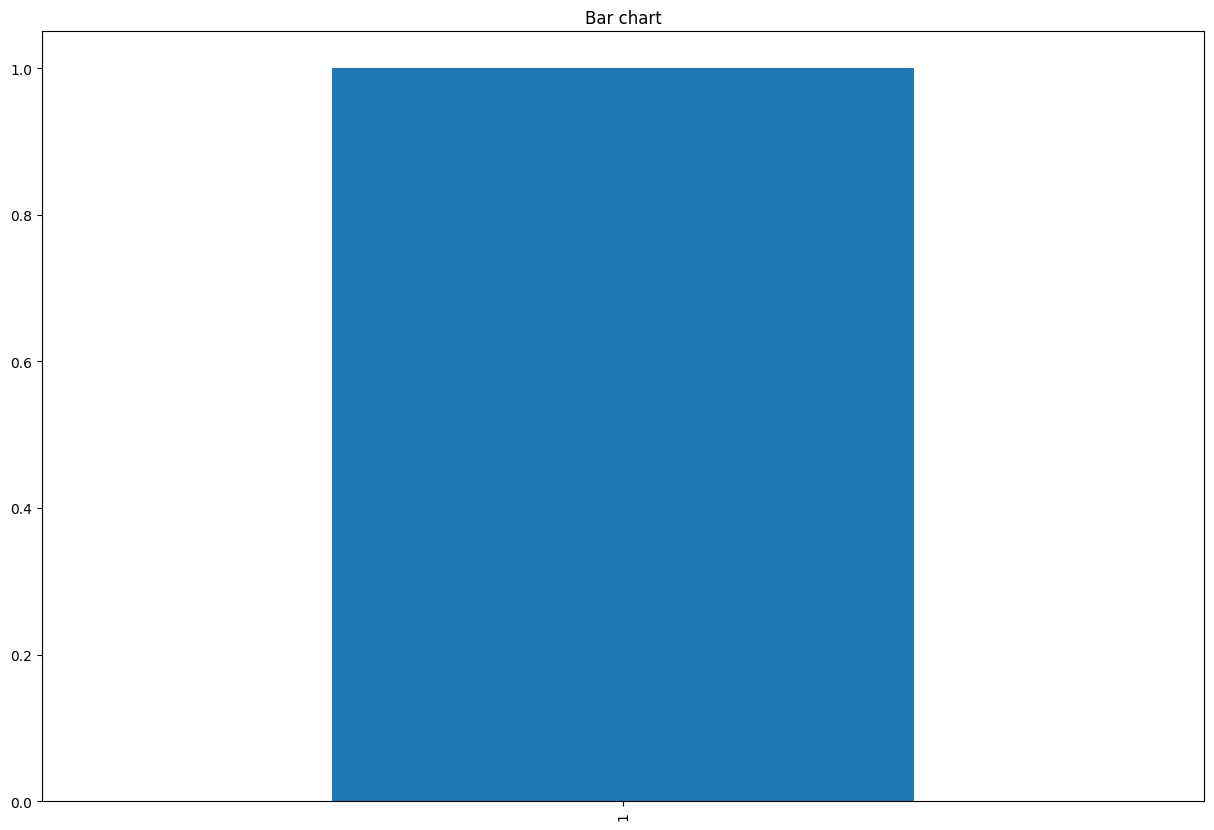

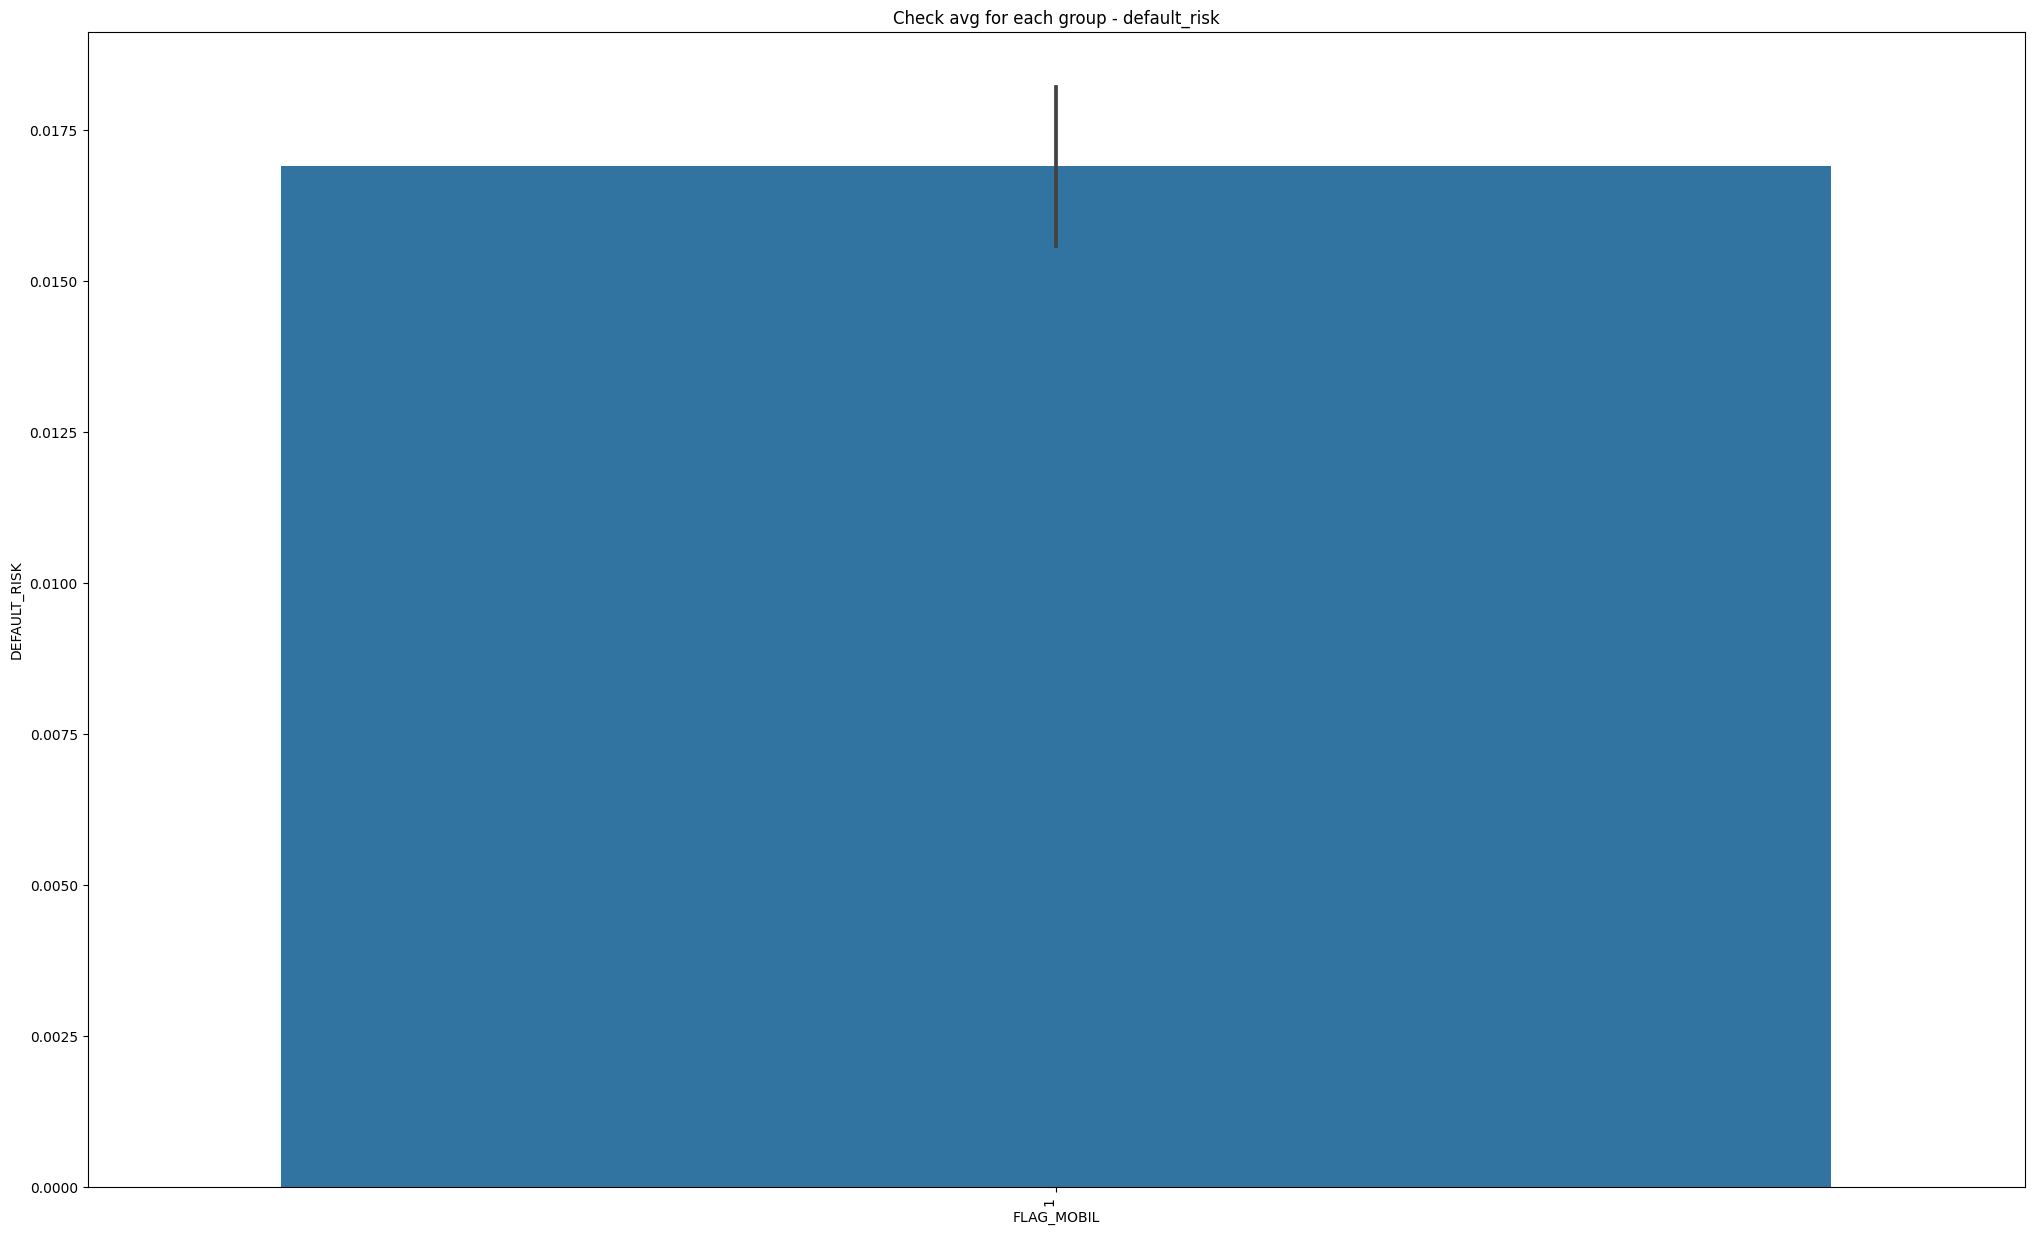

In [ ]:
nominal_des(credit_df,'FLAG_MOBIL','DEFAULT_RISK')

There is only one variable and these days practically everyone has a mobile phone.

**This variable shouldn't be considered for modelling.**

### `FLAG_WORK_PHONE`

If the client owns a work phone.

Percentage value of the column:
0    0.774474
1    0.225526
Name: FLAG_WORK_PHONE, dtype: float64

Quantitative value of the column:
0    28235
1     8222
Name: FLAG_WORK_PHONE, dtype: int64



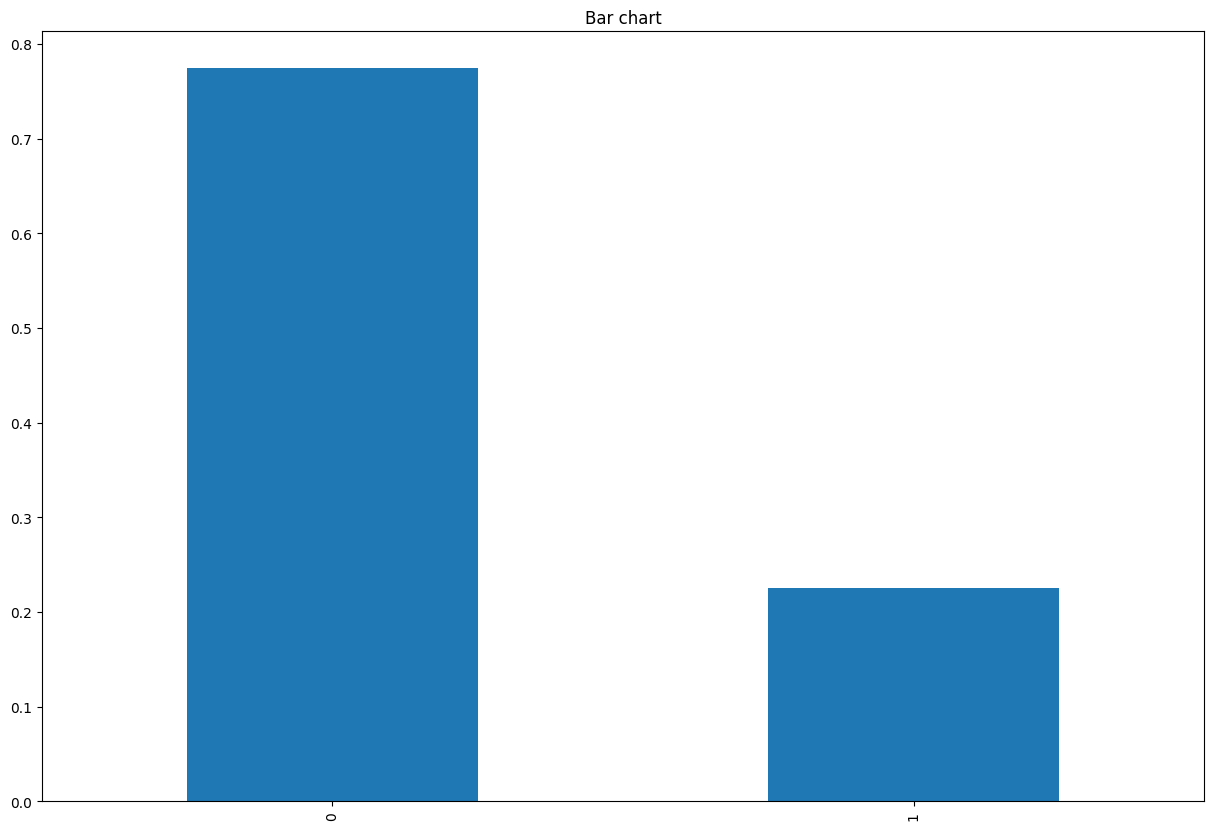

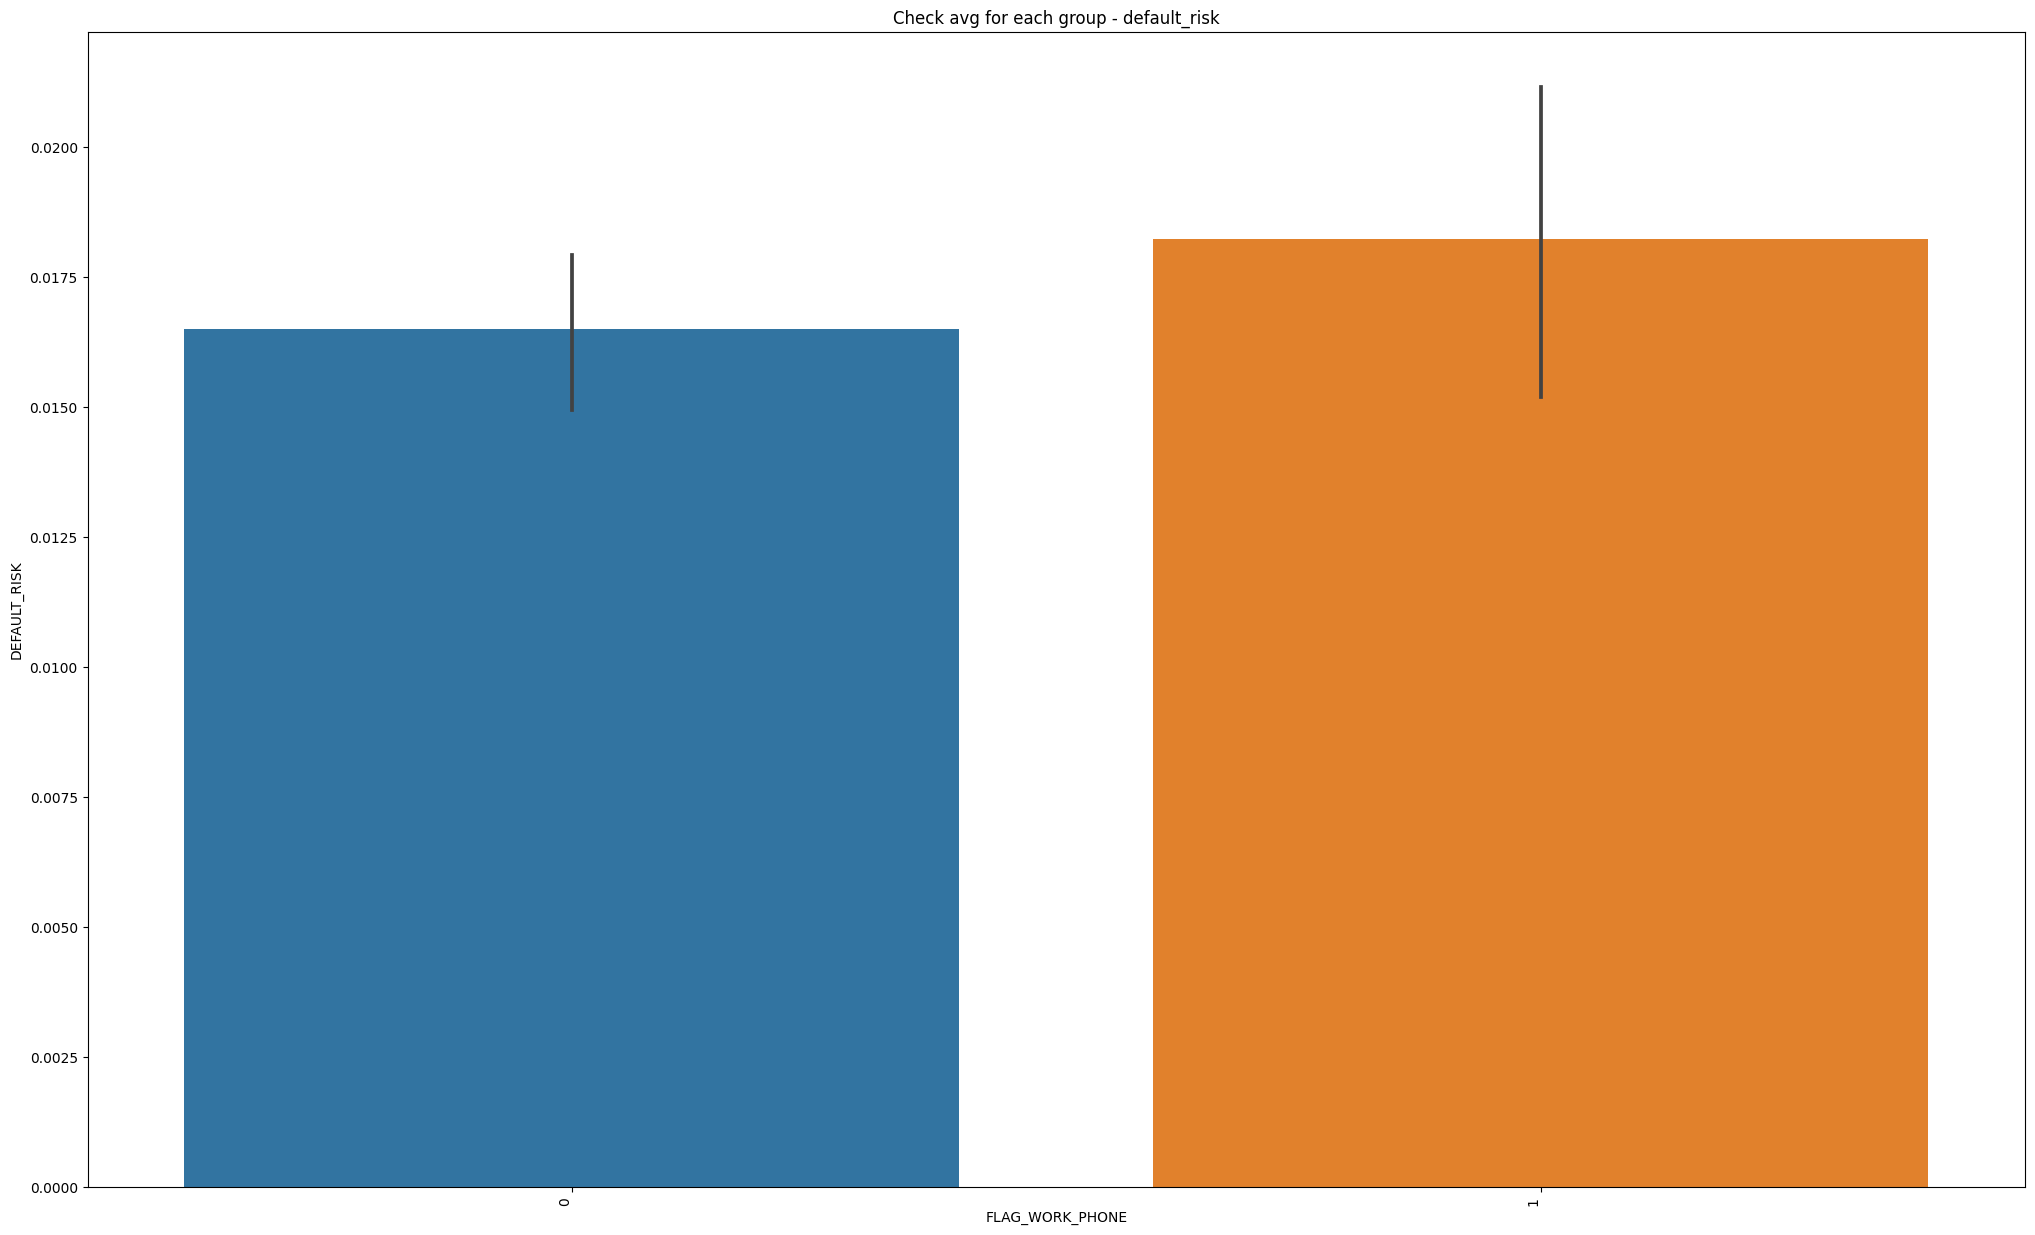

In [ ]:
nominal_des(credit_df,'FLAG_WORK_PHONE','DEFAULT_RISK')

In [ ]:
work_phone=test_chi(credit_df,'FLAG_WORK_PHONE','DEFAULT_RISK')

Null Hypothesis (Ho): variables FLAG_WORK_PHONE and DEFAULT_RISK are independent 
Alternative Hypothesis (Ha): variables aren't independent

Contingency Table
DEFAULT_RISK         0    1
FLAG_WORK_PHONE            
0                27769  466
1                 8072  150

Alpha=0.050, p=0.304
Independent (fail to reject H0) p-value>alpha


#### **Analysis**

At first glance, we have many more applicants that don't own a work phone than those who do!

It looks like applicants who own a work phone have slighty lower credit default risk than those who don't.

The variables ```FLAG_WORK_PHONE``` and ```DEFAULT_RISK``` are independent.


#### **Conclusion**

Does it make sense? It does make sense. Having a work phone or not ias a very unreliable factor to consider. An employed applicant can have or not a work phone.

**This variable shouldn't be considered for modelling.**

### `FLAG_PHONE`

If the applicant owns a phone.

Percentage value of the column:
0    0.705187
1    0.294813
Name: FLAG_PHONE, dtype: float64

Quantitative value of the column:
0    25709
1    10748
Name: FLAG_PHONE, dtype: int64



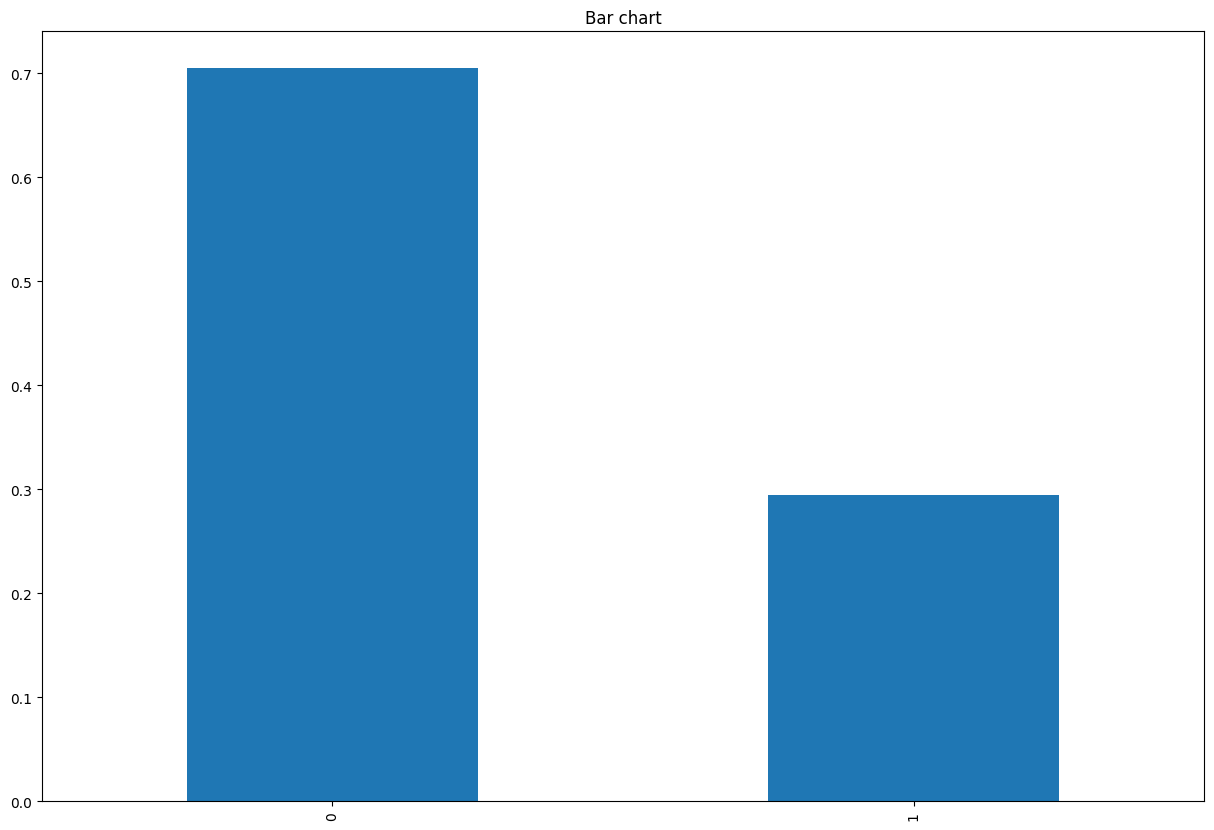

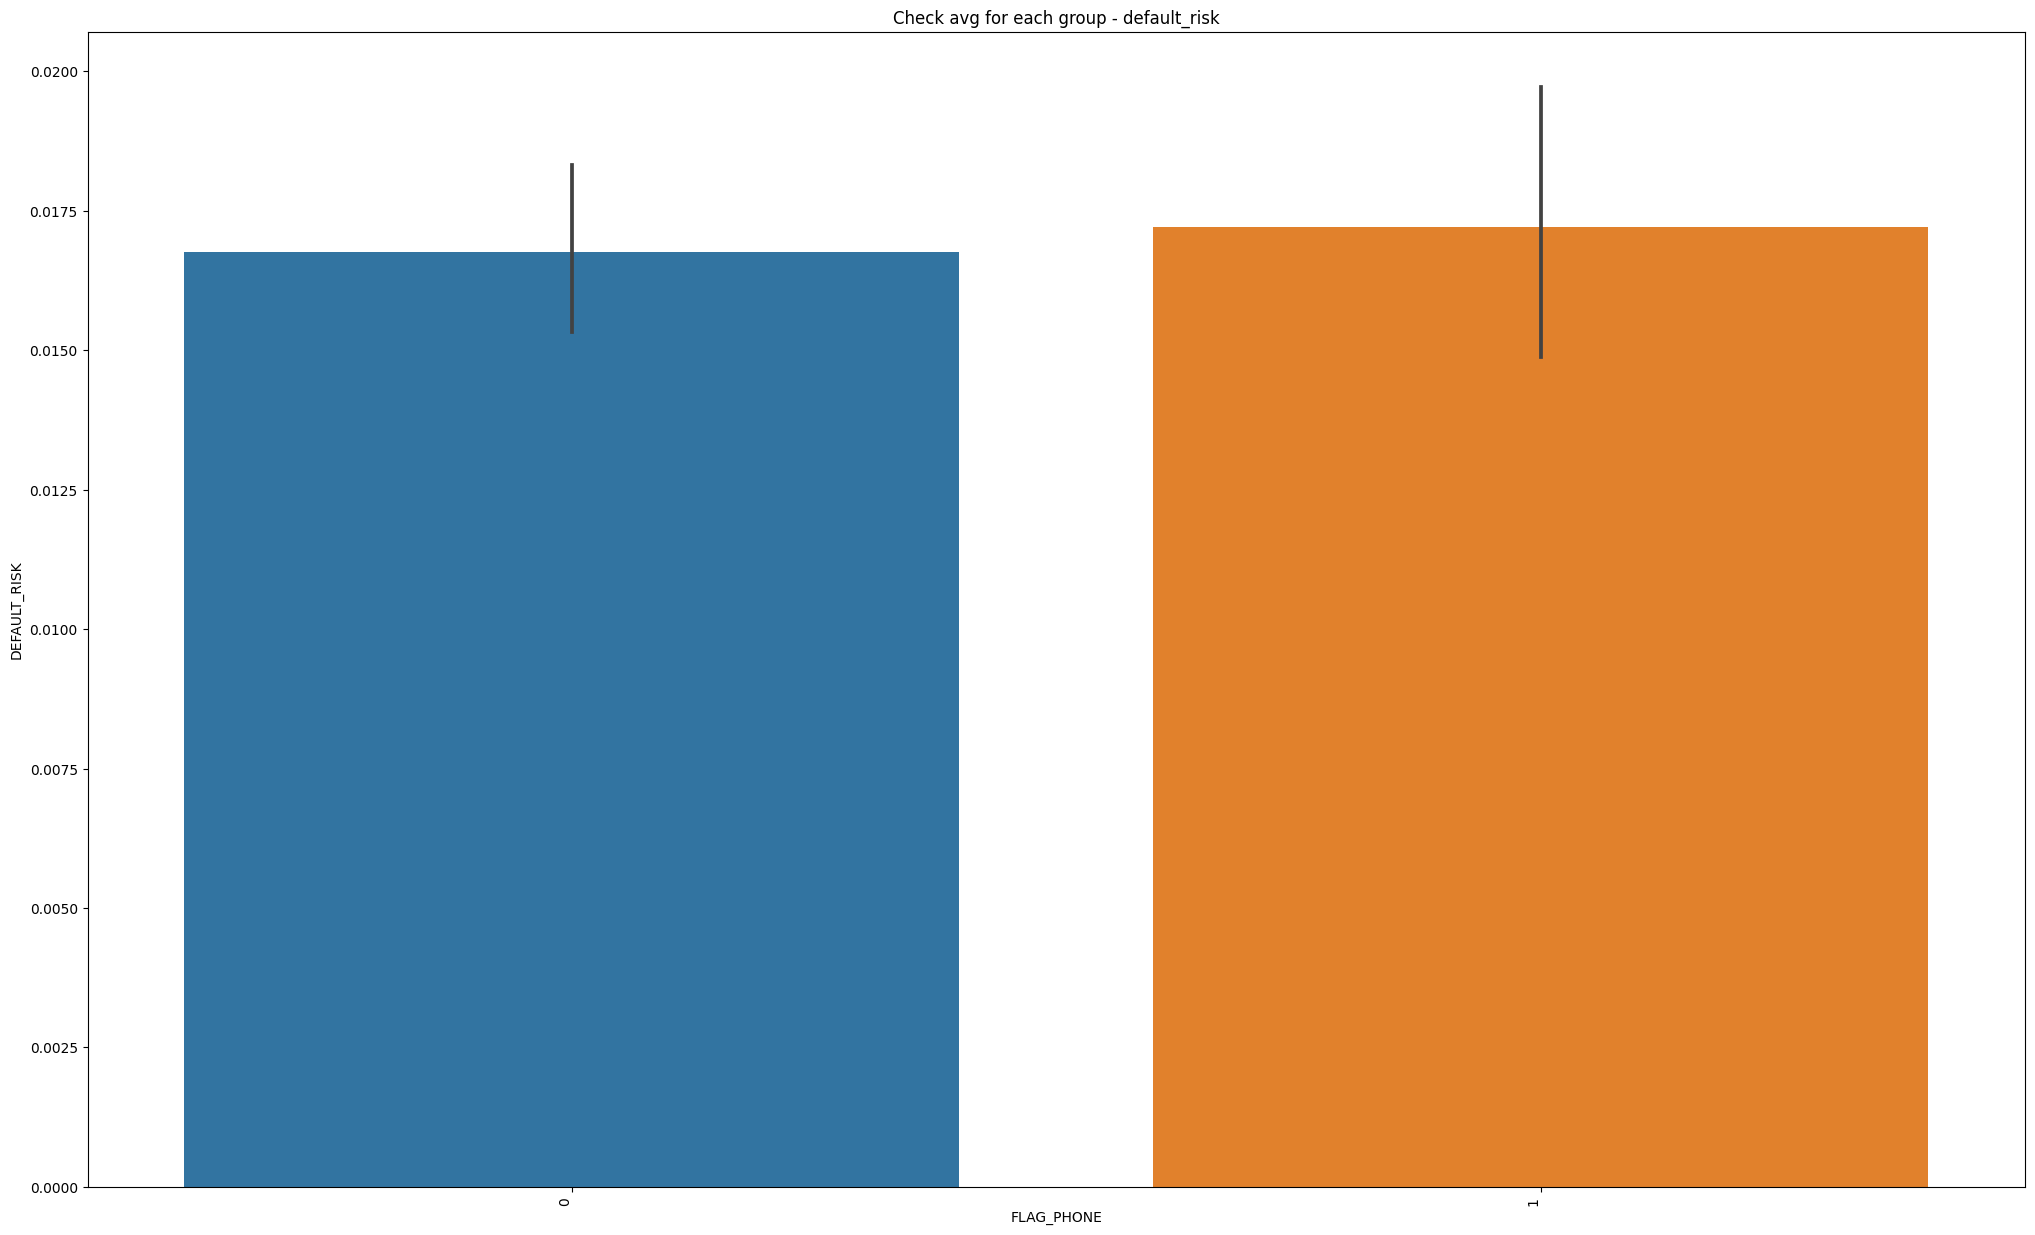

In [ ]:
nominal_des(credit_df,'FLAG_PHONE','DEFAULT_RISK')

In [ ]:
phone = test_chi(credit_df,'FLAG_PHONE','DEFAULT_RISK')

Null Hypothesis (Ho): variables FLAG_PHONE and DEFAULT_RISK are independent 
Alternative Hypothesis (Ha): variables aren't independent

Contingency Table
DEFAULT_RISK      0    1
FLAG_PHONE              
0             25278  431
1             10563  185

Alpha=0.050, p=0.796
Independent (fail to reject H0) p-value>alpha


#### **Analysis**

Not owning a phone is the most commom value.

It looks like phone owners have a very slighty higher risk of defaulting. Howeveer, due to the sample size of high risk applicants, it's very likely that this can be simply due to noise.

The variables ```FLAG_PHONE``` and ```DEFAULT_RISK``` are independent.

#### **Conclusion**

Owning a phone or not doesn't look like a risk factor for defaulting.

**This variable shouldn't be considered for modelling.**

### `FLAG_EMAIL`

If the applicant has an email address.

Percentage value of the column:
0    0.910278
1    0.089722
Name: FLAG_EMAIL, dtype: float64

Quantitative value of the column:
0    33186
1     3271
Name: FLAG_EMAIL, dtype: int64



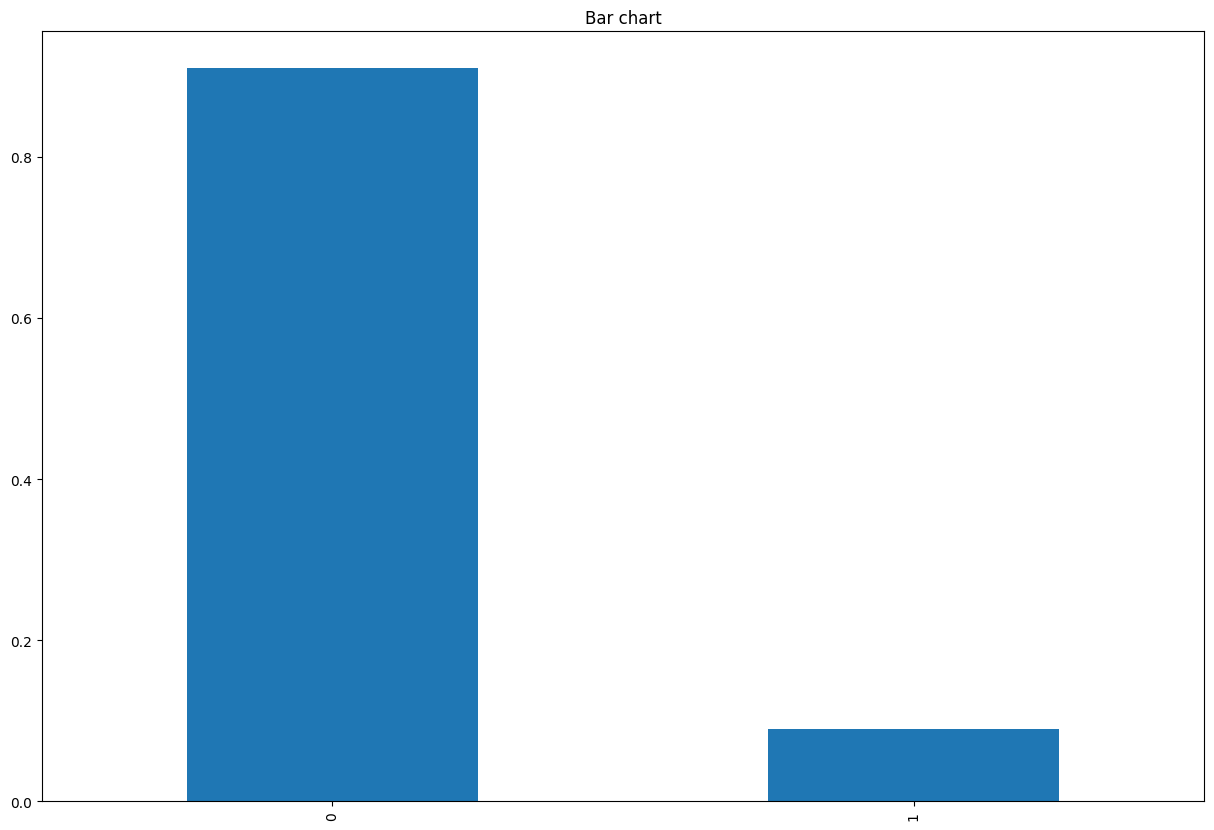

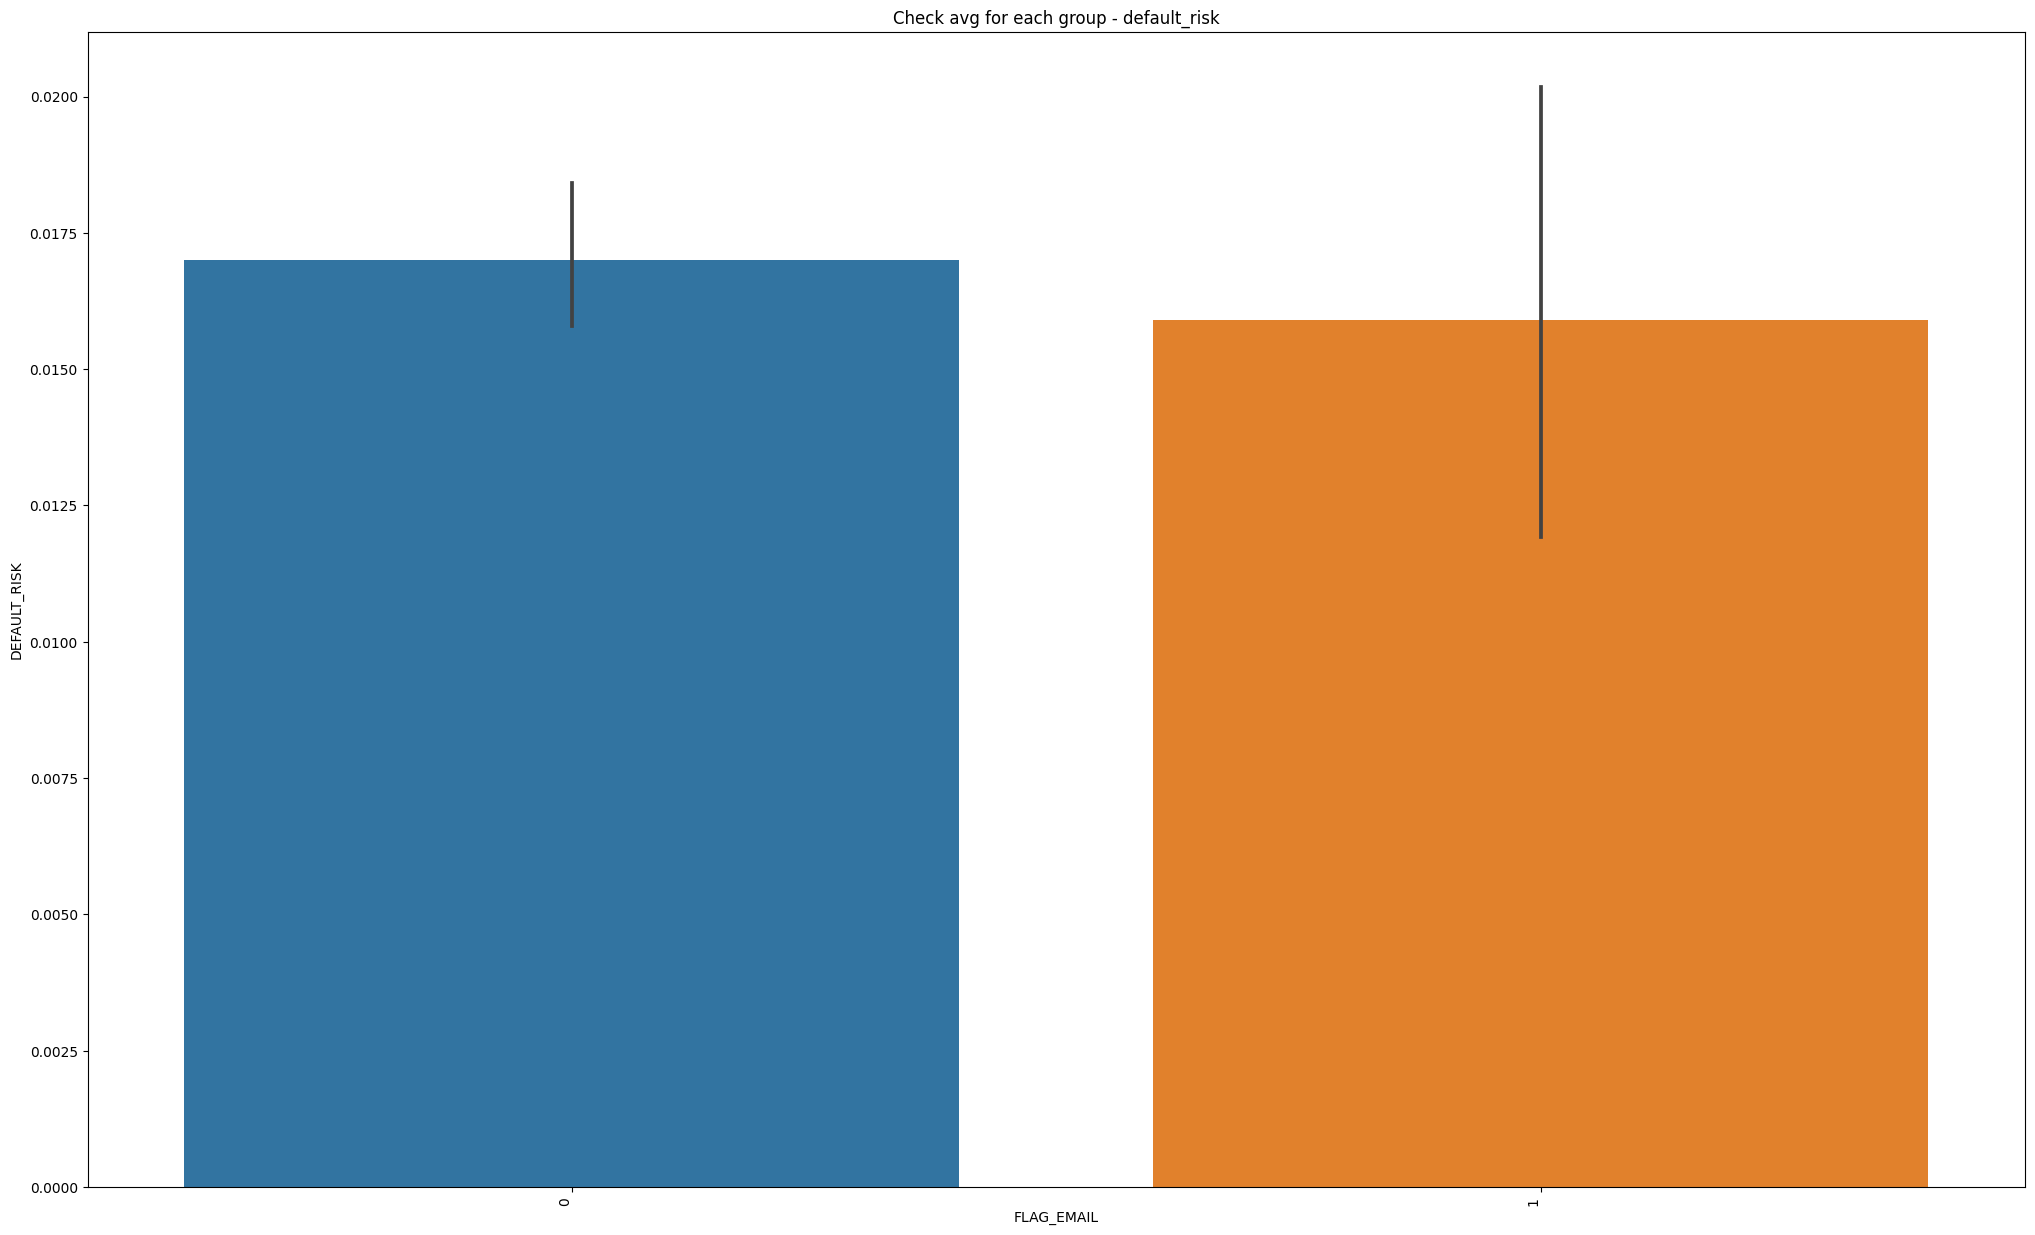

In [ ]:
nominal_des(credit_df,'FLAG_EMAIL','DEFAULT_RISK')

In [ ]:
email = test_chi(credit_df,'FLAG_PHONE','DEFAULT_RISK')

Null Hypothesis (Ho): variables FLAG_PHONE and DEFAULT_RISK are independent 
Alternative Hypothesis (Ha): variables aren't independent

Contingency Table
DEFAULT_RISK      0    1
FLAG_PHONE              
0             25278  431
1             10563  185

Alpha=0.050, p=0.796
Independent (fail to reject H0) p-value>alpha


#### **Analysis**

Not owning an email is the most common situation, as 90% of the applicants don't own one.

It looks like applicants who don't have an associated email address have a slighty higher risk of defaulting. However, due to the sample size of high risk applicants, it's very likely that this can be simply due to noise.

The variables ```FLAG_EMAIL``` and ```DEFAULT_RISK``` are independent.


#### **Conclusion**

Owning an email address or not doesn't look like a risk factor for defaulting.

**This variable shouldn't be considered for modelling.**

### `OCCUPATION_TYPE`


The applicant's occupation.

Percentage value of the column:
Laborers                 0.247115
Core staff               0.142874
Sales staff              0.138657
Managers                 0.119838
Drivers                  0.085064
High skill tech staff    0.055025
Accountants              0.049375
Medicine staff           0.048023
Cooking staff            0.026060
Security staff           0.023554
Cleaning staff           0.021922
Private service staff    0.013687
Low-skill Laborers       0.006963
Waiters/barmen staff     0.006923
Secretaries              0.006008
HR staff                 0.003382
Realty agents            0.003143
IT staff                 0.002387
Name: OCCUPATION_TYPE, dtype: float64

Quantitative value of the column:
Laborers                 6211
Core staff               3591
Sales staff              3485
Managers                 3012
Drivers                  2138
High skill tech staff    1383
Accountants              1241
Medicine staff           1207
Cooking staff             655
Security staf

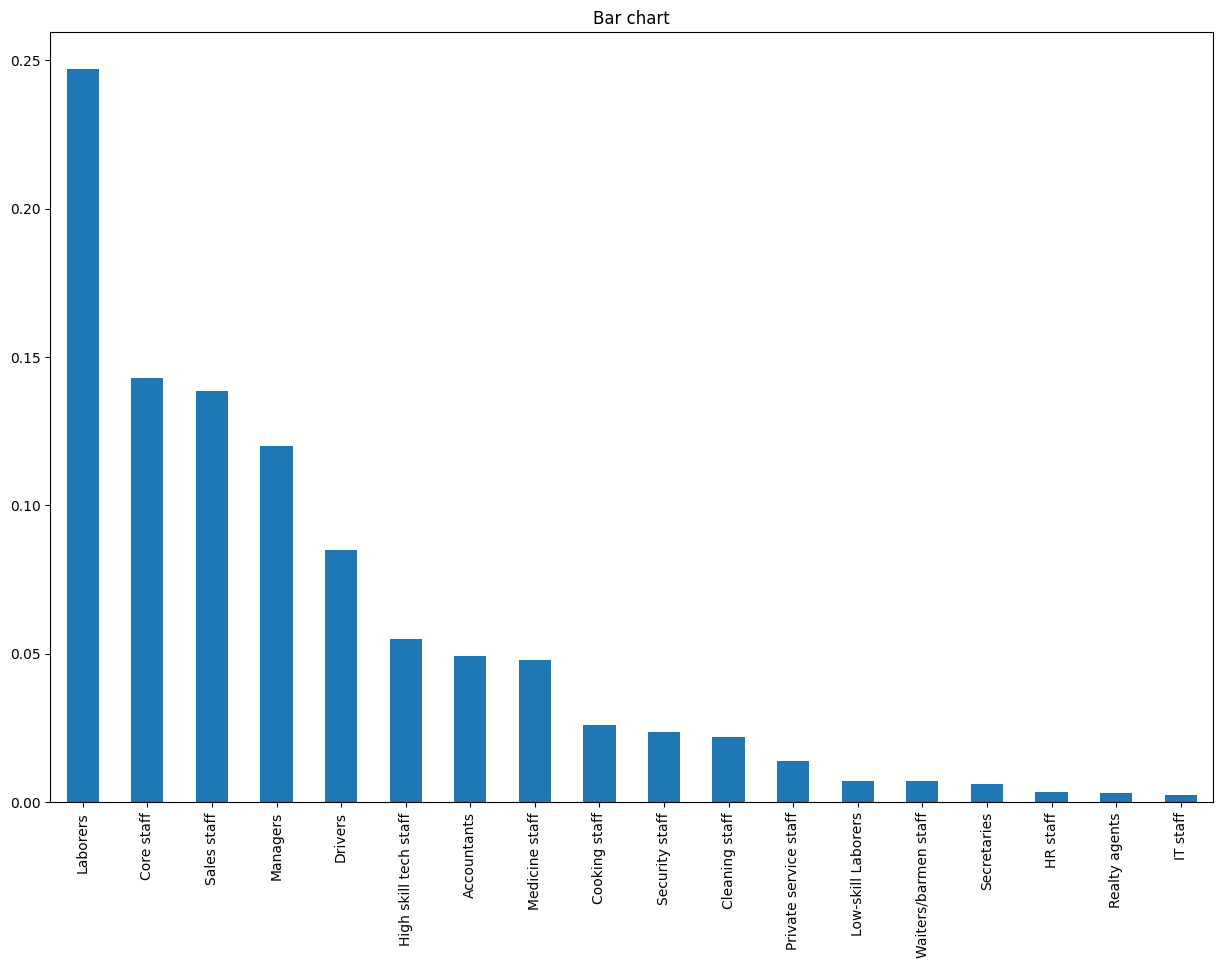

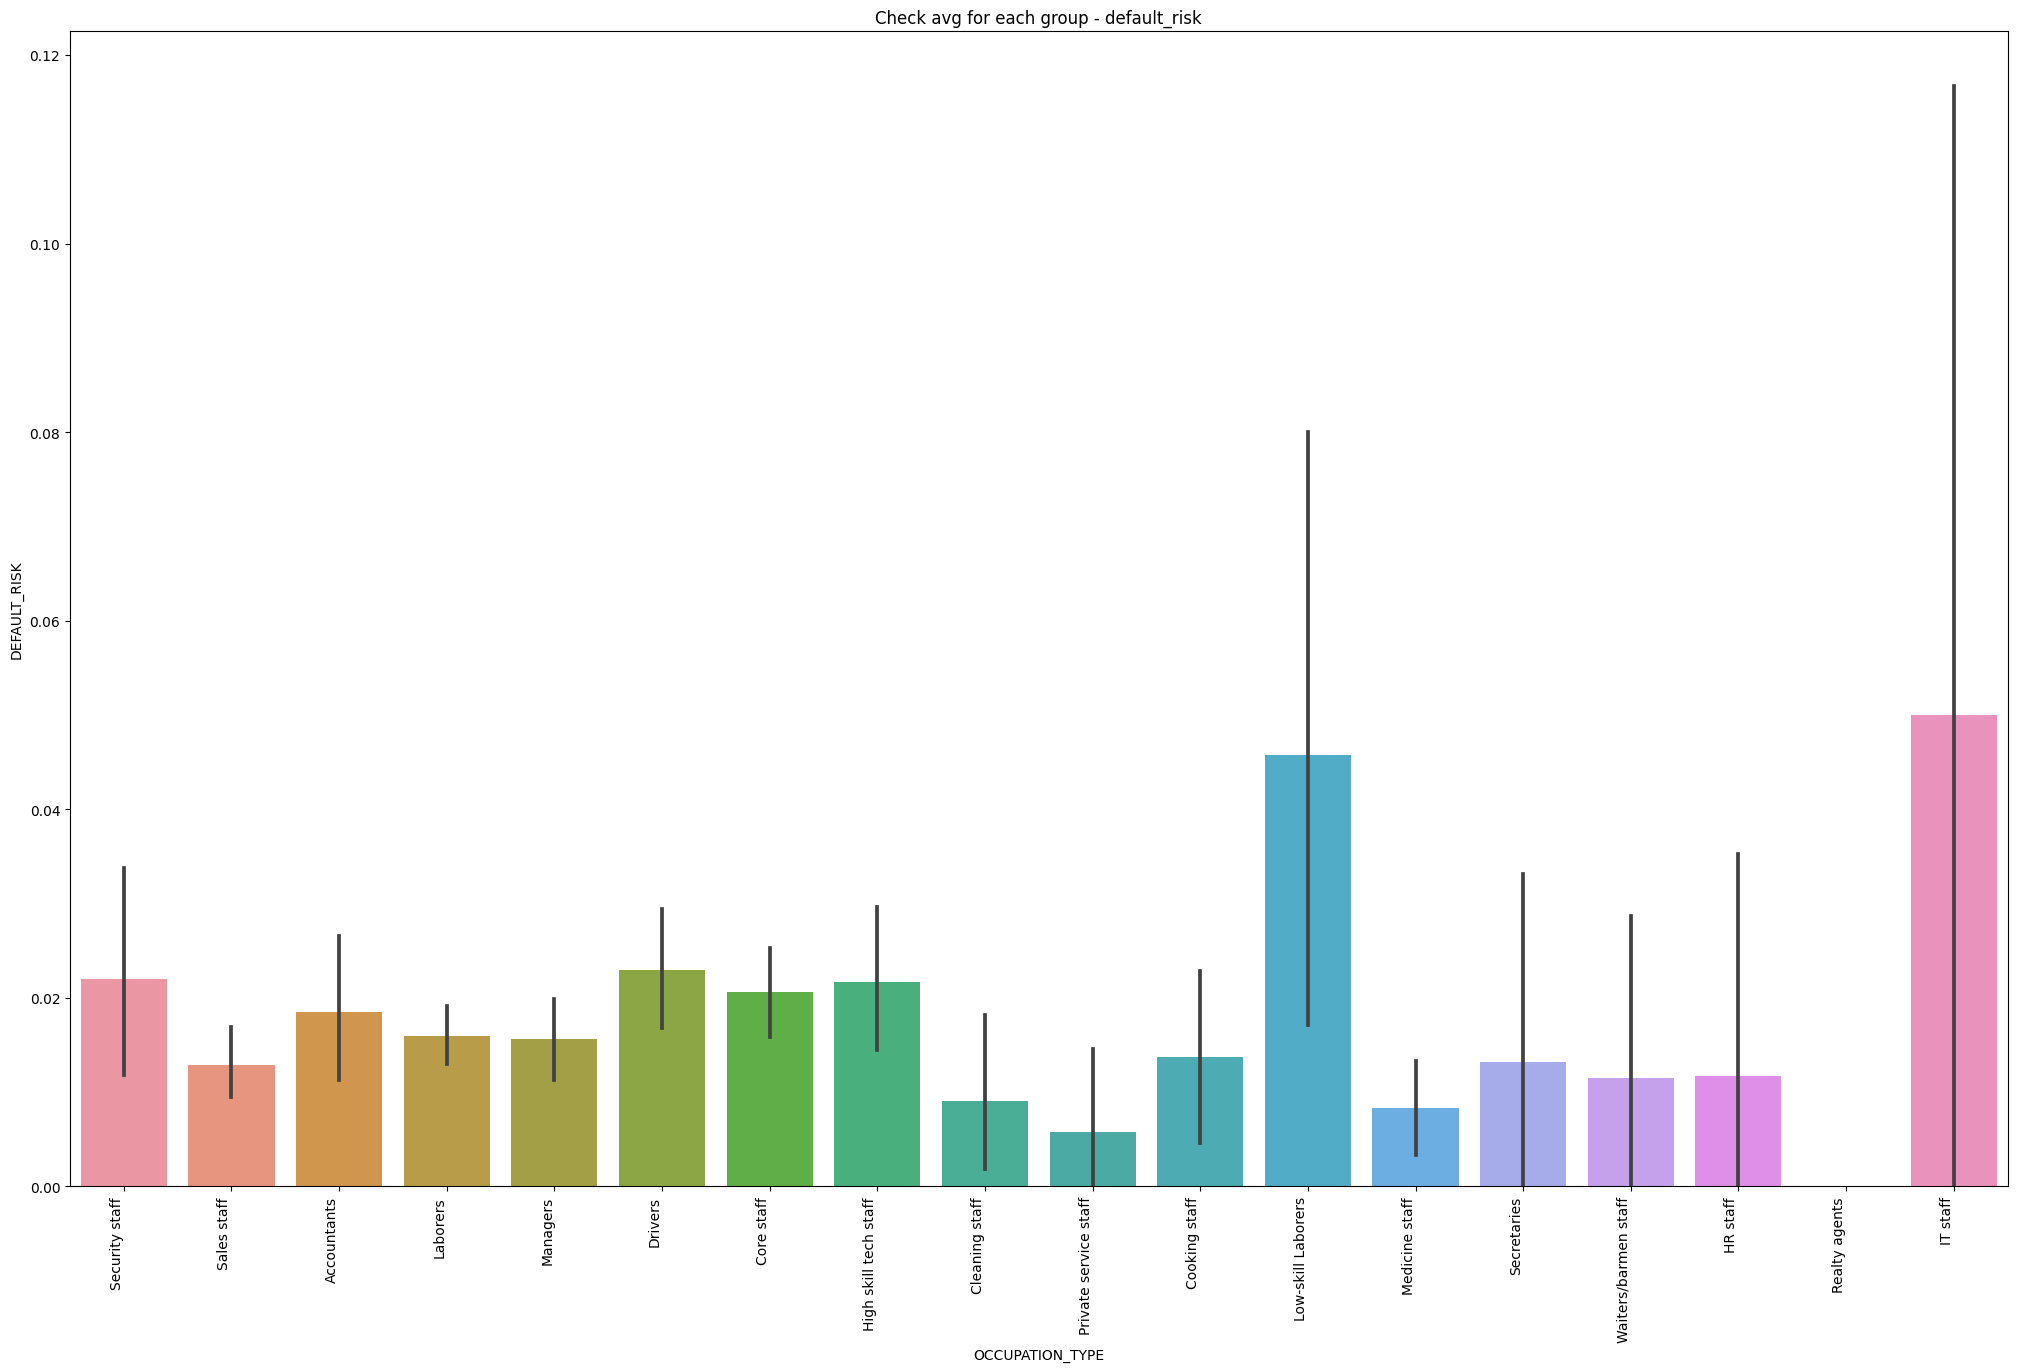

In [ ]:
nominal_des(credit_df,'OCCUPATION_TYPE','DEFAULT_RISK')

In [ ]:
occupation = test_chi(credit_df,'OCCUPATION_TYPE','DEFAULT_RISK')

Null Hypothesis (Ho): variables OCCUPATION_TYPE and DEFAULT_RISK are independent 
Alternative Hypothesis (Ha): variables aren't independent

Contingency Table
DEFAULT_RISK              0   1
OCCUPATION_TYPE                
Accountants            1218  23
Cleaning staff          546   5
Cooking staff           646   9
Core staff             3517  74
Drivers                2089  49
HR staff                 84   1
High skill tech staff  1353  30
IT staff                 57   3
Laborers               6112  99
Low-skill Laborers      167   8
Managers               2965  47
Medicine staff         1197  10
Private service staff   342   2
Realty agents            79   0
Sales staff            3440  45
Secretaries             149   2
Security staff          579  13
Waiters/barmen staff    172   2

Alpha=0.050, p=0.001
Dependent (reject H0) p-value < alpha


In [ ]:
cramers_v(occupation)

V = 0.039822795383004476
Cramer's V Degrees of Freedom = 1

   DoF  Small  Medium  Large
0  1.0   0.10    0.30   0.50
1  2.0   0.07    0.21   0.35
2  3.0   0.06    0.17   0.29
3  4.0   0.05    0.15   0.25
4  5.0   0.04    0.13   0.22


#### **Analysis**

 - There are a toal of 18 possible occupation levels, being Laborers the most common applicants and HR staff, Realty agents, and IT Staff the less frequent ones.

- Now that this variables has the largest cadinality (a large amount of unique values) from all that I've seen, it starts to be trickier to analyse. Mostly, because we need to also be aware of the value counts of each unique value while looking at average default risk.

- The variables ```OCCUPATION_TYPE``` and ```DEFAULT_RISK``` are dependent and after have a negligible effect size.

#### **Conclusion**

It makes sense since I've seen that ```NAME_INCOME_TYPE``` (income category) is significant and has a negligible effect size. Mostly due to income stability. This, the applicants' occupation should also be related to that.

**This variable should be considered for modelling.**

# Answering Business Questions

In [ ]:
df2 = credit_df[['CODE_GENDER','FLAG_OWN_REALTY','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','NAME_INCOME_TYPE','OCCUPATION_TYPE','DEFAULT_RISK']]


## What seem to be the main contributing variables/features to a high (or low) default risk? Are they significant? Why?

* CODE_GENDER
* FLAG_OWN_REALTY
* NAME_FAMILY_STATUS
*	NAME_HOUSING_TYPE
*	NAME_INCOME_TYPE
*	OCCUPATION_TYPE



These variables are crucial for a deeper understanding of the candidates' profile. Whether an applicant owns or rents their residence reflects financial stability and commitment. Marital status, such as marriage, is often associated with greater financial responsibility, influencing spending practices and financial management. Additionally, the nature of income, whether from active employment or pensions, provides valuable insights into the consistency and reliability of the income source, fundamental aspects in assessing default risk

## What about the least contributing ones (if at all)? Do they make sense why?

All other variables not mentioned as influencing the risk of default are considered to be independent variables. This means that, after analyses and statistical tests, they did not demonstrate a significant link or substantial effect on predicting or assessing the applicants' risk of default. Therefore, they were considered less impactful or less relevant to the risk analysis model.

### Should we reject applicants according to all of these variables? If not, which ones we shouldn't consider and why?

It's important to not forget that credit card applications tend to have a meaningful impact on people’s lives, we need to choose our variables ***carefully***. We should avoid using discriminatory variables for deciding if a credit card application is accepted or not.

Specifically, the variable CODE_GENDER should not be used as a basis for decision-making as it introduces gender-based discrimination. The imbalance in our dataset, with twice as many entries for females, negatively affects the interaction among variables. Achieving gender equity in entries would provide a more comprehensive context for analysis and decision-making.

Não devemos considerar a variável CODE_GENDER, pois é descriminatório basear a escolha pelo género. O facto da nossa df ter o dobro de mulheres influencia a de forma negativa a interacção entre as variáveis. Devia haver uma equidade de entradas entre género para podermos ter um contexto mais abrangente.

### Are there any other variables that you would like to have in order to better understand credit default risk? Which ones would you like to have?

* **Monthly income details:** Understanding the specific monthly income levels could offer a more nuanced view of financial stability.

* **Existing loan obligations:** Knowing if applicants have active loans provides insight into their debt-to-income ratio and financial commitments.

* **Property assets for mortgage:** Information on assets eligible for mortgage collateralization could shed light on an applicant's financial security.

* **Centralized financial records:** Having access to a centralized financial history could provide a comprehensive overview of an applicant's financial behavior and patterns.

* **Contractual ties:** Understanding any contractual commitments an applicant holds could indicate stability and reliability.

**Guarantor presence:** Knowing if there's a guarantor involved in the application process could signify additional security and confidence in repayment."

These variables would likely contribute significantly to the assessment of credit default risk by offering a more comprehensive view of applicants' financial status and commitments.

**Outro**

Thank you for taking the time to read through my work. I hope you found it informative. Should you come across any errors or have suggestions, I would greatly appreciate your feedback. Enjoy!

**Disclaimer**_
 The data used in this notebook was provided by Miles in The Sky as part of the final project for the 'Data Analytics 101' module.

 The author is not affiliated with any of the entities mentioned nor received any kind of compensation. The information contained in this work is provided on an "as is" basis with no guarantees of completeness, accuracy, usefulness or timeliness.